In [ ]:
from datetime import timedelta
import time
starttime = time.perf_counter()

# Carico Dataset e importo Librerie

In [82]:
from google.colab import drive
#drive.mount('/content/drive')

In [83]:
!pip install scikit-learn # installazione del pacchetto scikit-learn, utile per l'apprendimento automatico e l'analisi dei dati

In [84]:
!pip install colorama #installazione pacchetto colorama per supportre l'uso di colori

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objects as go
#Algoritmi di classificazione
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#Feature selection
from sklearn.ensemble import ExtraTreesClassifier
from colorama import Fore, Back, Style
#Librerie per la normalizzazione
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [86]:
# ROC, Confusion Matrix, KFold, Classification Report
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

In [87]:
'''
dataset_train_path = '/content/drive/MyDrive/progetto_infrastrutture/diabetes_train.csv'
dataset_test_path = '/content/drive/MyDrive/progetto_infrastrutture/diabetes_test.csv'
# Carica il dataset utilizzando pandas
df_train = pd.read_csv(dataset_train_path)
df_test = pd.read_csv(dataset_test_path)
'''
from google.colab import files

# Caricamento dei dataset
uploaded = files.upload()

df_train = pd.read_csv('diabetes_train.csv')
df_test = pd.read_csv('diabetes_test.csv')


Saving diabetes_test.csv to diabetes_test (1).csv
Saving diabetes_train.csv to diabetes_train (1).csv


# Analisi dei Dataset e preprocessing

**Analisi e visualizzazione dei dati**

In [88]:
df_test.shape #restituisce una tupla contenente le dimensioni del DataFrame

(47276, 22)

In [89]:
df_train.shape

(189102, 22)

In [90]:
df_train.head(5) #restituisce le prime 5 righe del DataFrame

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,5.0,15.0,28.0,1.0,Female,7.0,5.0,5.0
1,0.0,1.0,1.0,1.0,35.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,Male,8.0,5.0,9.0
2,0.0,0.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,Male,10.0,6.0,5.0
3,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,Male,7.0,5.0,8.0
4,2.0,0.0,1.0,1.0,32.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,14.0,30.0,0.0,Male,10.0,4.0,6.0


In [91]:
df_test.head(5) #restituisce le prime 5 righe del DataFrame

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,0.0,1,29.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,2.0,0.0,0.0,0,4,6.0,9.0
1,0.0,1,0.0,1,42.0,1.0,0.0,0.0,0,0,...,1,0.0,4.0,30.0,30.0,1.0,0,9,4.0,2.0
2,0.0,1,1.0,1,31.0,1.0,1.0,0.0,1,1,...,1,0.0,1.0,0.0,5.0,0.0,0,10,6.0,3.0
3,2.0,1,1.0,1,38.0,0.0,0.0,0.0,0,1,...,1,0.0,3.0,0.0,0.0,0.0,0,4,4.0,5.0
4,0.0,0,0.0,1,28.0,0.0,0.0,0.0,0,1,...,1,0.0,3.0,0.0,0.0,0.0,1,7,5.0,9.0


In [92]:
df_train.describe() #estituisce un riepilogo statistico delle colonne nel DataFrame

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
count,189102.000000,188913.000000,188913.000000,188913.000000,188913.000000,188913.000000,188913.000000,188913.000000,188913.000000,188913.000000,...,188913.000000,188913.000000,188913.000000,188913.000000,188913.000000,188913.000000,188913.000000,188913.000000,188913.000000,188913.000000
mean,0.306898,0.417541,0.401958,0.963375,28.965148,0.410729,0.038806,0.086733,0.780031,0.621201,...,0.062314,0.962771,0.063415,2.480327,3.923129,3.741389,0.152949,7.858422,5.139937,6.929301
std,0.704108,0.493155,0.490295,0.187841,6.549596,0.491967,0.193133,0.281444,0.414226,0.485089,...,0.241726,0.189322,0.243709,1.029214,7.868139,8.236090,0.359939,3.235621,0.946264,2.375361
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,13.000000,6.000000,11.000000


In [93]:
df_test.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,...,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000
mean,0.311363,0.422646,0.402551,0.963174,28.907776,0.416998,0.039259,0.085815,0.775954,0.621520,...,0.961820,0.064938,2.482422,3.999090,3.790486,0.157881,0.476817,7.885291,5.135819,6.920192
std,0.708739,0.493985,0.490417,0.188337,6.562805,0.493068,0.194212,0.280094,0.416957,0.485013,...,0.191633,0.246419,1.028668,7.963363,8.283825,0.364634,0.499468,3.242215,0.946042,2.375763
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [94]:
df_train.info() #Fornisce un riepilogo conciso delle informazioni sul DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189102 entries, 0 to 189101
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          189102 non-null  float64
 1   HighBP                188913 non-null  float64
 2   HighChol              188913 non-null  float64
 3   CholCheck             188913 non-null  float64
 4   BMI                   188913 non-null  float64
 5   Smoker                188913 non-null  float64
 6   Stroke                188913 non-null  float64
 7   HeartDiseaseorAttack  188913 non-null  float64
 8   PhysActivity          188913 non-null  float64
 9   Fruits                188913 non-null  float64
 10  Veggies               188913 non-null  float64
 11  HvyAlcoholConsump     188913 non-null  float64
 12  AnyHealthcare         188913 non-null  float64
 13  NoDocbcCost           188913 non-null  float64
 14  GenHlth               188913 non-null  float64
 15  

In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47276 entries, 0 to 47275
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          47276 non-null  float64
 1   HighBP                47276 non-null  int64  
 2   HighChol              47276 non-null  float64
 3   CholCheck             47276 non-null  int64  
 4   BMI                   47276 non-null  float64
 5   Smoker                47276 non-null  float64
 6   Stroke                47276 non-null  float64
 7   HeartDiseaseorAttack  47276 non-null  float64
 8   PhysActivity          47276 non-null  int64  
 9   Fruits                47276 non-null  int64  
 10  Veggies               47276 non-null  int64  
 11  HvyAlcoholConsump     47276 non-null  int64  
 12  AnyHealthcare         47276 non-null  int64  
 13  NoDocbcCost           47276 non-null  float64
 14  GenHlth               47276 non-null  float64
 15  MentHlth           

Dicotomizzazione del dataset, dividendo la feature target in due classi
0: no diabete
1:diabete

In [96]:
df_train['Diabetes_012'] = df_train['Diabetes_012'].replace(2,1)
df_train.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,5.0,15.0,28.0,1.0,Female,7.0,5.0,5.0
1,0.0,1.0,1.0,1.0,35.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,Male,8.0,5.0,9.0
2,0.0,0.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,Male,10.0,6.0,5.0
3,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,Male,7.0,5.0,8.0
4,1.0,0.0,1.0,1.0,32.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,14.0,30.0,0.0,Male,10.0,4.0,6.0


In [97]:
df_test['Diabetes_012'] = df_test['Diabetes_012'].replace(2, 1)
df_test.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,0.0,1,29.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,2.0,0.0,0.0,0,4,6.0,9.0
1,0.0,1,0.0,1,42.0,1.0,0.0,0.0,0,0,...,1,0.0,4.0,30.0,30.0,1.0,0,9,4.0,2.0
2,0.0,1,1.0,1,31.0,1.0,1.0,0.0,1,1,...,1,0.0,1.0,0.0,5.0,0.0,0,10,6.0,3.0
3,1.0,1,1.0,1,38.0,0.0,0.0,0.0,0,1,...,1,0.0,3.0,0.0,0.0,0.0,0,4,4.0,5.0
4,0.0,0,0.0,1,28.0,0.0,0.0,0.0,0,1,...,1,0.0,3.0,0.0,0.0,0.0,1,7,5.0,9.0


**Visualizzazione della distribuzione dei dati**

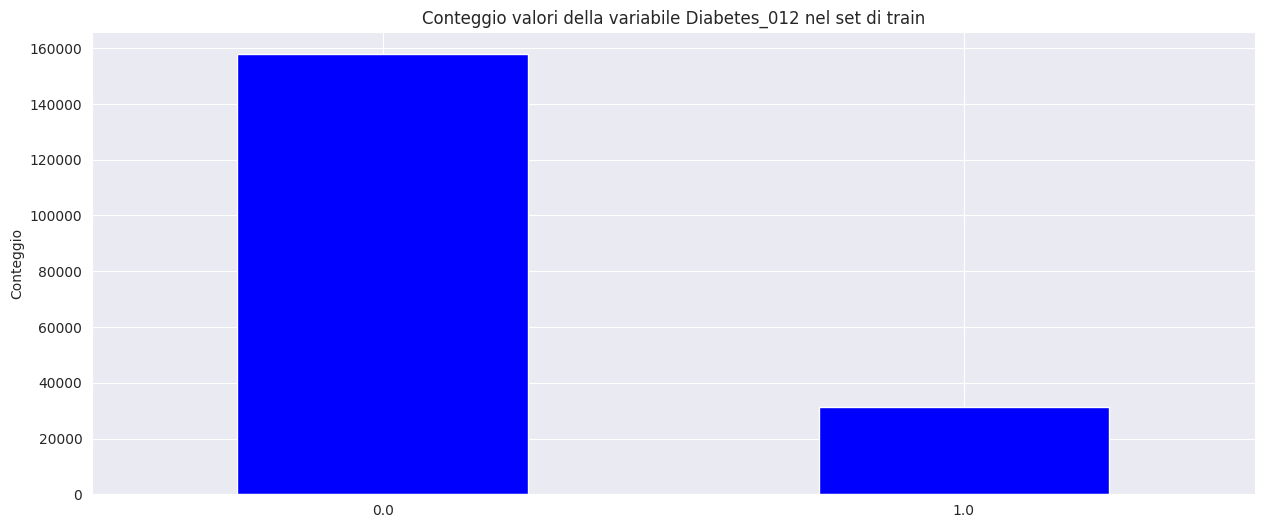

In [98]:
df_train.Diabetes_012.value_counts().plot(kind="bar", color= 'blue') #calcola il conteggio di ciascun valore presente nella colonna Diabetes_012.
                                                                       #Restituisce una Series di Pandas contenente i conteggi dei valori unici.
plt.title("Conteggio valori della variabile Diabetes_012 nel set di train")# crea un grafico a barre
plt.xticks(rotation=0)
plt.ylabel("Conteggio")
plt.show()

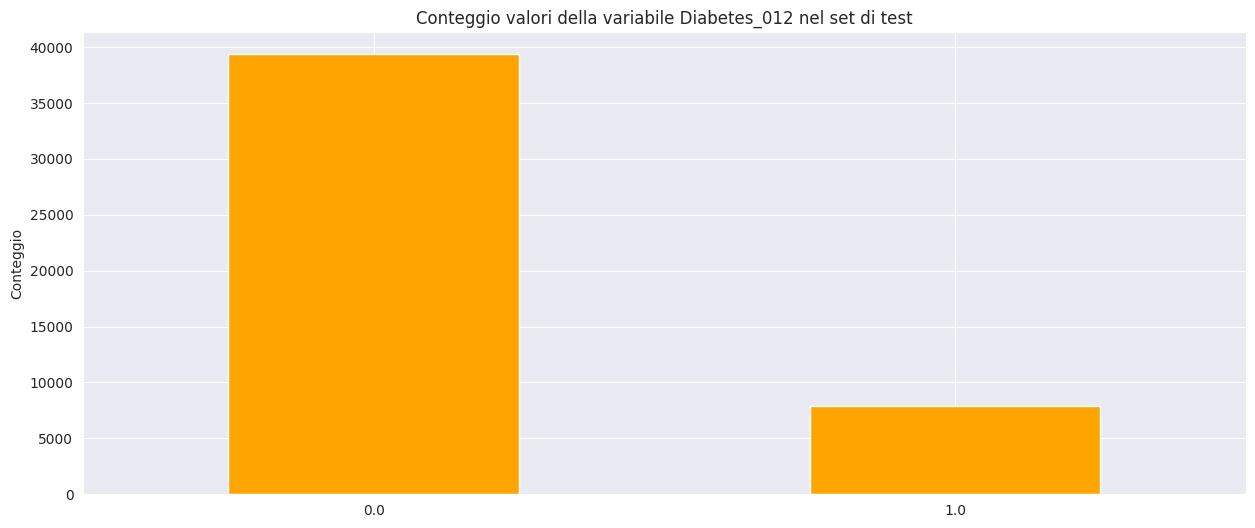

In [99]:
df_test.Diabetes_012.value_counts().plot(kind="bar", color= 'orange')
plt.title("Conteggio valori della variabile Diabetes_012 nel set di test")
plt.xticks(rotation=0)
plt.ylabel("Conteggio")
plt.show()

In [100]:
category_counts = df_train['Diabetes_012'].value_counts()

# Creare il grafico a torta utilizzando i conteggi
fig = go.Figure(data=[go.Pie(labels=['<b>Persone non diabetiche<b>','<b>Persone diabetiche<b>'],
                             hole=0.3,pull=[0,0.3],marker_colors=['#393E46', '#a696c8'],
                             textposition='inside',values=category_counts.values)])
fig.update_layout(title_text="Distribuzione dell'attributo Diabetes_012 nel set di train")
fig.show()

In [101]:
category_counts = df_test['Diabetes_012'].value_counts()

# Creare il grafico a torta utilizzando i conteggi
fig = go.Figure(data=[go.Pie(labels=['<b>Persone non diabetiche<b>','<b>Persone diabetiche<b>'],hole=0.3,pull=[0,0.3],marker_colors=['#77529e',  '#a5bdfd'],textposition='inside',values=category_counts.values)])
fig.update_layout(title_text="Distribuzione dell'attributo Diabetes_012 nel set di test")
fig.show()

Questa funzione **v_counts()** accetta un DataFrame come input e itera attraverso tutte le colonne del DataFrame. Per ogni colonna, calcola il conteggio dei valori unici presenti in quella colonna utilizzando il metodo value_counts() di Pandas. Successivamente, stampa i risultati del conteggio dei valori e aggiunge una linea di separazione per distinguere i conteggi delle colonne.

In [102]:
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [103]:
v_counts(df_train)

0.0    157830
1.0     31272
Name: Diabetes_012, dtype: int64
_____________________________________________________________________________
0.0    110034
1.0     78879
Name: HighBP, dtype: int64
_____________________________________________________________________________
0.0    112978
1.0     75935
Name: HighChol, dtype: int64
_____________________________________________________________________________
1.0    181994
0.0      6919
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27.0    17478
26.0    14308
24.0    13707
28.0    12190
25.0    11656
        ...  
91.0        1
84.0        1
88.0        1
99.0        1
86.0        1
Name: BMI, Length: 80, dtype: int64
_____________________________________________________________________________
0.0    111321
1.0     77592
Name: Smoker, dtype: int64
_____________________________________________________________________________
0.0    181582
1.0      7331
Name: Stroke, dtype: int64
_

In [104]:
v_counts(df_test)

0.0    39361
1.0     7915
Name: Diabetes_012, dtype: int64
_____________________________________________________________________________
0    27295
1    19981
Name: HighBP, dtype: int64
_____________________________________________________________________________
0.0    28245
1.0    19031
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    45535
0     1741
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27.0    4242
26.0    3612
24.0    3455
25.0    3053
28.0    3022
        ... 
79.0       1
95.0       1
99.0       1
66.0       1
98.0       1
Name: BMI, Length: 77, dtype: int64
_____________________________________________________________________________
0.0    27562
1.0    19714
Name: Smoker, dtype: int64
_____________________________________________________________________________
0.0    45420
1.0     1856
Name: Stroke, dtype: int64
________________________________

Sostiutisco i valori 'Female'/'F' e 'Male'/'M' della colonna 'Sex' ,rispettivamente, con i valori 0 e 1, sia sul set di train che sul set di test

In [105]:
mappatura_sostituzioni = {'Female': 0, 'Male': 1, 'F': 0, 'M':1}
df_train['Sex'] = df_train['Sex'].replace(mappatura_sostituzioni)

In [106]:
mappatura_sostituzioni = {'Female': 0, 'Male': 1, 'F': 0, 'M':1}
df_test['Sex'] = df_test['Sex'].replace(mappatura_sostituzioni)

Verifico le istanze con un indice di BMI >70 che quindi possono influenzare l'analsi del dataset

In [107]:
df_train[df_train['BMI']>=50]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
65,0.0,1.0,1.0,1.0,52.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,30.0,1.0,1,11.0,4.0,6.0
280,1.0,1.0,0.0,1.0,55.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,15.0,30.0,1.0,0,9.0,5.0,6.0
396,0.0,0.0,0.0,1.0,55.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0,8.0,4.0,1.0
405,0.0,0.0,0.0,1.0,88.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,4.0,0.0,5.0,0.0,1,3.0,2.0,5.0
449,0.0,0.0,1.0,1.0,60.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,14.0,3.0,0.0,0,5.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188616,1.0,1.0,1.0,1.0,59.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,5.0,30.0,7.0,0.0,1,1.0,4.0,5.0
188871,0.0,1.0,0.0,1.0,53.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,10.0,1.0,0,10.0,4.0,4.0
188906,1.0,0.0,0.0,1.0,55.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0,7.0,6.0,6.0
188979,0.0,0.0,0.0,1.0,50.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,1.0,10.0,0.0,1,5.0,5.0,9.0


In [108]:
 df_test[df_test['BMI']>=50]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
22,0.0,0,0.0,1,86.0,0.0,0.0,0.0,1,1,...,1,0.0,3.0,1.0,1.0,0.0,0,8,6.0,8.0
43,1.0,1,1.0,1,51.0,0.0,0.0,0.0,0,1,...,1,1.0,3.0,2.0,2.0,1.0,0,8,4.0,2.0
190,1.0,0,1.0,1,56.0,1.0,0.0,0.0,0,0,...,1,0.0,4.0,25.0,3.0,0.0,0,2,4.0,5.0
348,0.0,1,0.0,1,55.0,0.0,0.0,0.0,1,0,...,1,0.0,2.0,0.0,0.0,1.0,0,9,5.0,9.0
608,0.0,0,1.0,1,55.0,1.0,0.0,0.0,0,0,...,1,0.0,4.0,10.0,0.0,1.0,0,9,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46819,1.0,1,1.0,1,52.0,0.0,0.0,0.0,0,1,...,1,1.0,3.0,0.0,7.0,1.0,0,10,4.0,5.0
46894,1.0,1,0.0,1,51.0,0.0,0.0,0.0,1,0,...,1,0.0,3.0,0.0,30.0,1.0,0,10,5.0,5.0
46987,0.0,0,0.0,1,53.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,5,6.0,10.0
47121,0.0,0,0.0,1,51.0,0.0,0.0,0.0,0,1,...,1,0.0,3.0,0.0,10.0,0.0,1,8,5.0,4.0


In [109]:
soglia_bmi = 50  # setto la soglia massima di BMI a 50
df_train = df_train.loc[df_train['BMI'] < soglia_bmi]  # seleziono tutti gli indici con BMI < di 50

In [110]:
df_train[df_train['BMI']>=50] # verifico che i valori siano stati eliminati con successo

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [111]:
df_test = df_test.loc[df_test['BMI'] < soglia_bmi] # seleziono tutti gli indici con BMI < di 70

In [112]:
df_test[df_test['BMI']>=70] # verifico che i valori siano stati eliminati con successo

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


Distribuzione dei dati numeirci nel dataset di train

Questa funzione **plot_hist** è progettata per tracciare un istogramma utilizzando la libreria seaborn (sns) in un'area specifica del layout dei subplot

<ipython-input-113-85a44bc402f7>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-113-85a44bc402f7>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-113-85a44bc402f7>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

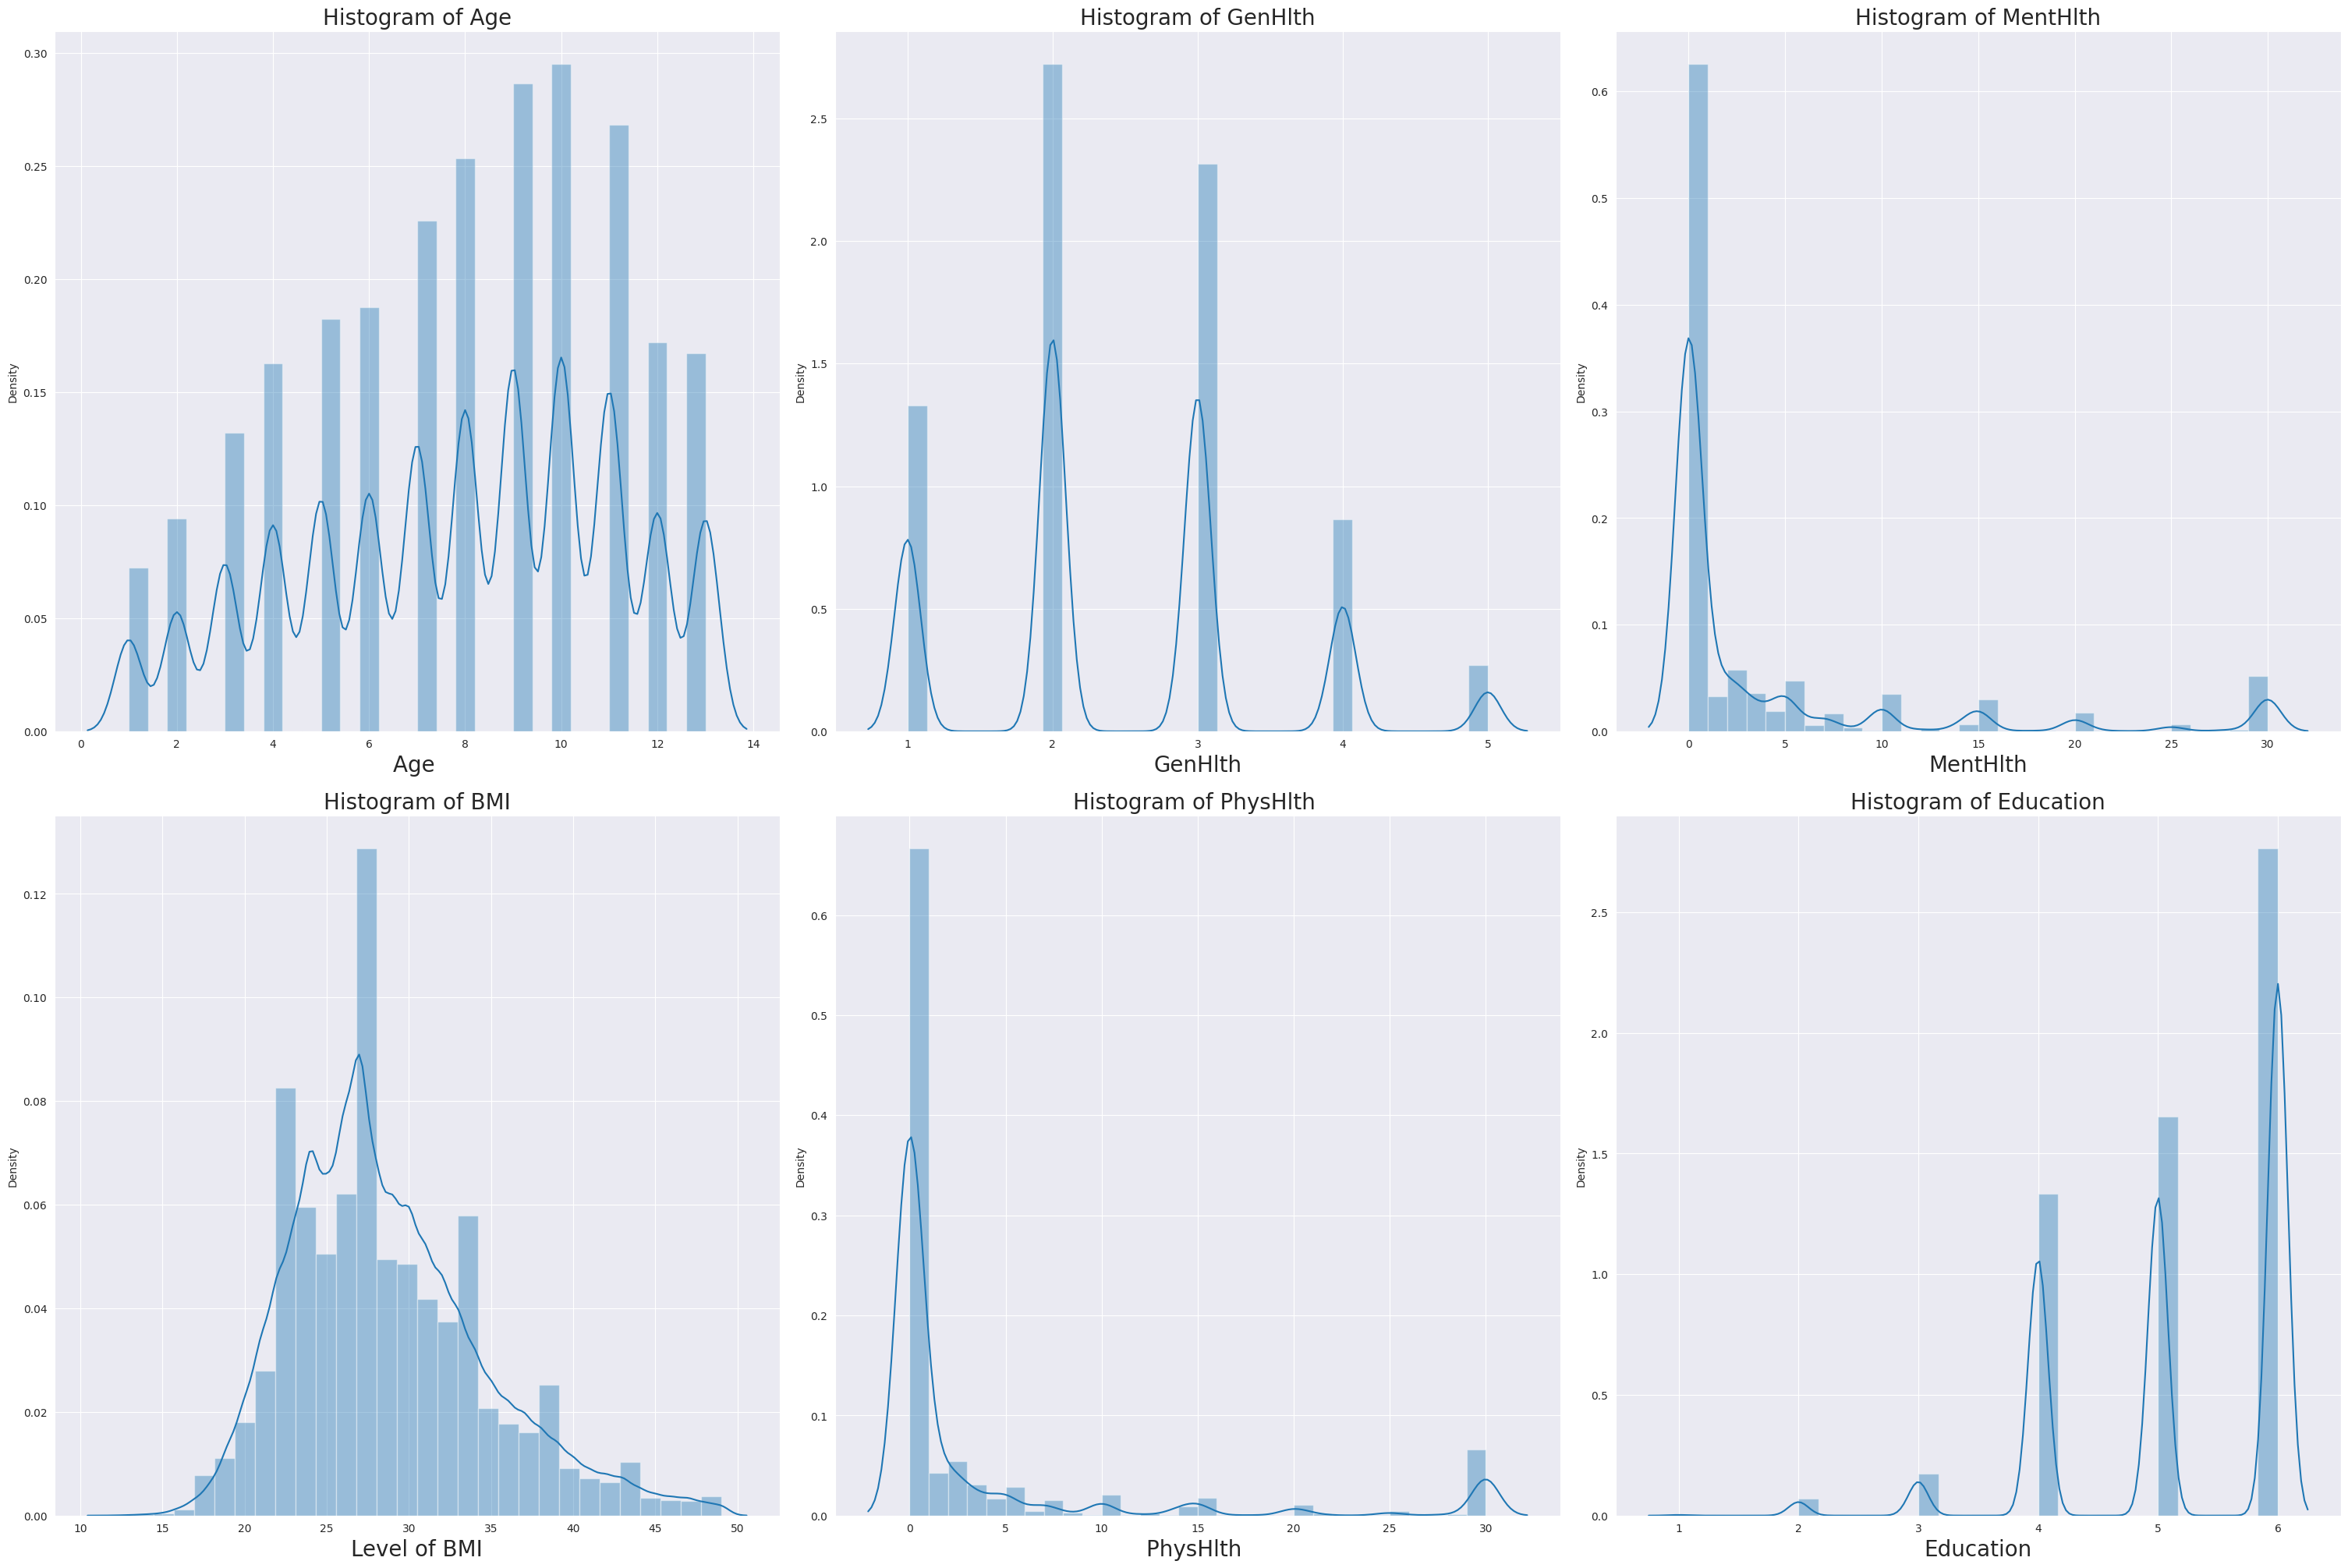

In [113]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
fig, axes = plt.subplots(2,3,figsize=(30,20),constrained_layout=True)
plot_hist(df_train.Age,
          title='Age',
          xlabel="Age ",
          ax=axes[0,0])
plot_hist(df_train.GenHlth,
          bins=30,
          title='GenHlth',
          xlabel='GenHlth',
          ax=axes[0,1])
plot_hist(df_train.MentHlth,
          title='MentHlth',
          xlabel='MentHlth',
          ax=axes[0,2])
plot_hist(df_train.BMI,
          bins=30,
          title='BMI',
          xlabel='Level of BMI',
          ax=axes[1,0])
plot_hist(df_train.PhysHlth ,
          title='PhysHlth ',
          xlabel='PhysHlth ',
          ax=axes[1,1])
plot_hist(df_train.Education,
          bins=30,
          title='Education',
          xlabel='Education',
          ax=axes[1,2])
plt.show()

Calcolo l'istogramma per capire meglio i dati

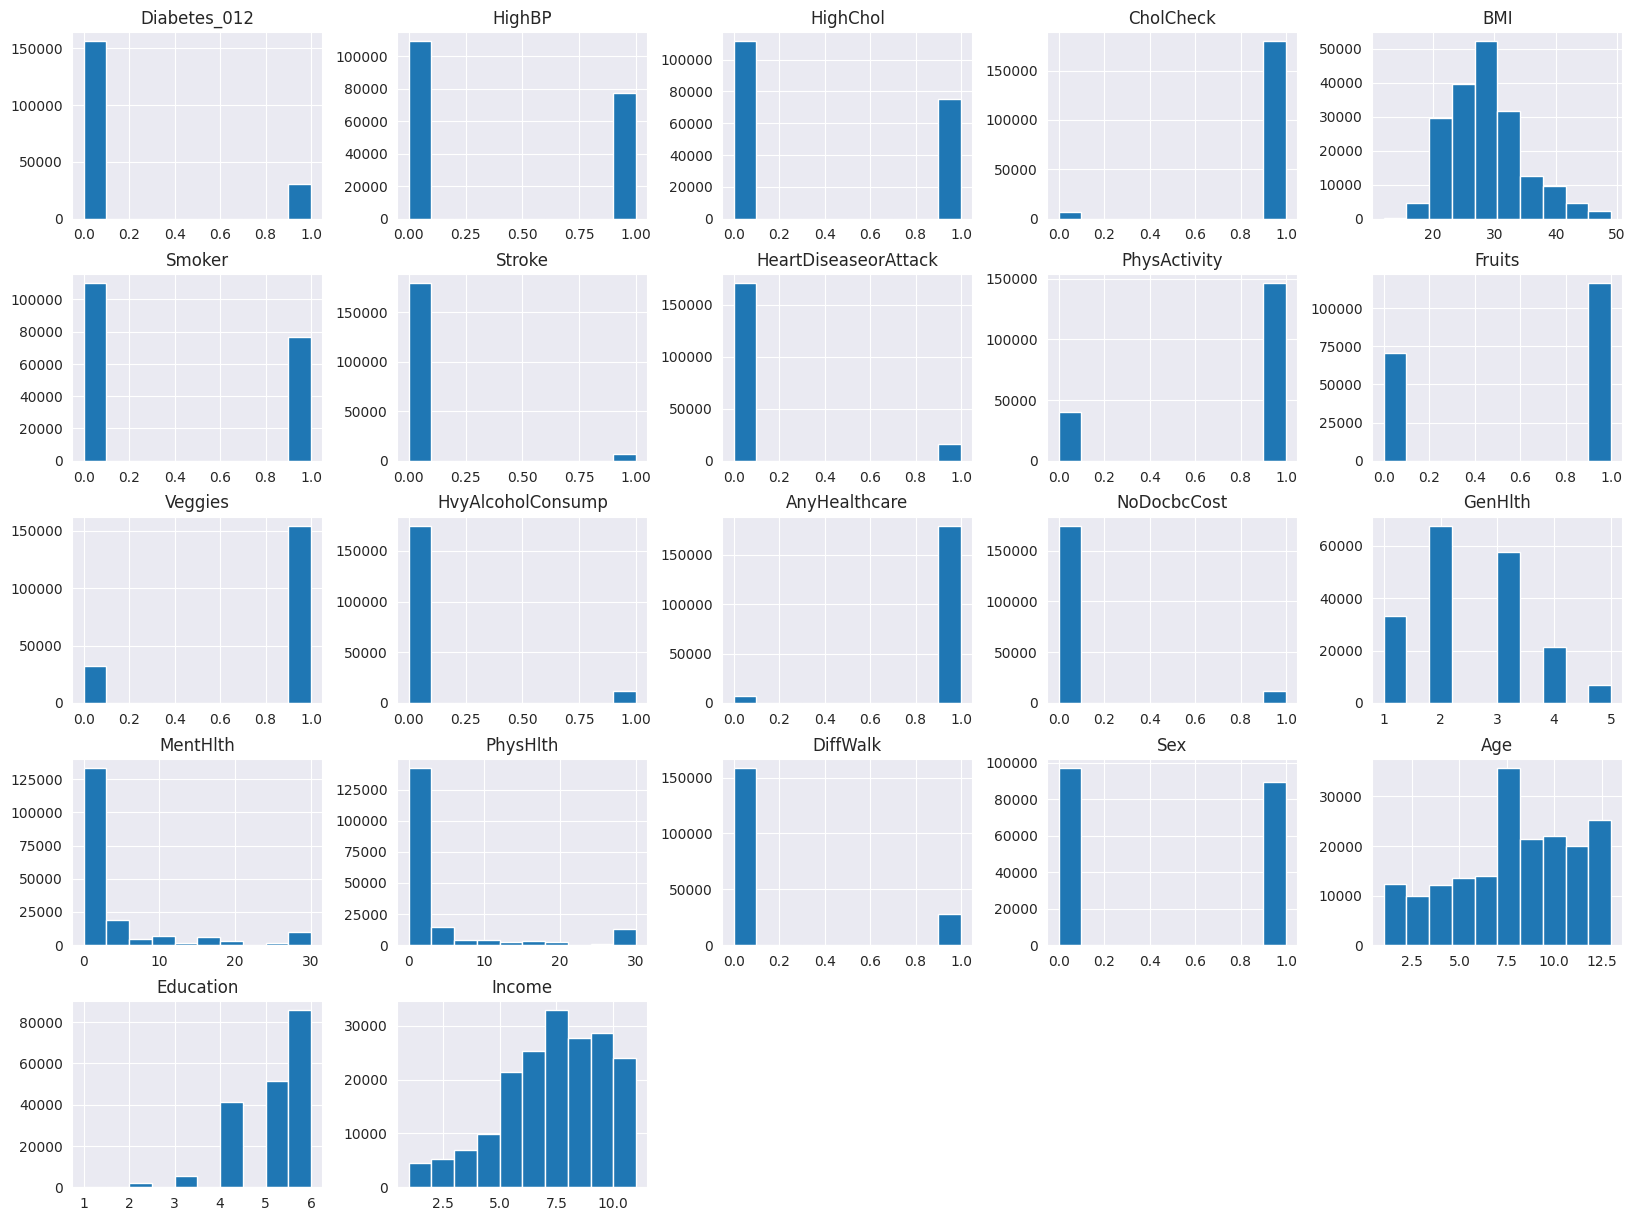

In [114]:
df_train.hist(figsize=(20,15)); #genera un istogramma per ciascuna colonna nel DataFrame

Verifico la correlazioni tra le features nel set di train

Text(0.5, 1.0, 'correlation of feature in the train set')

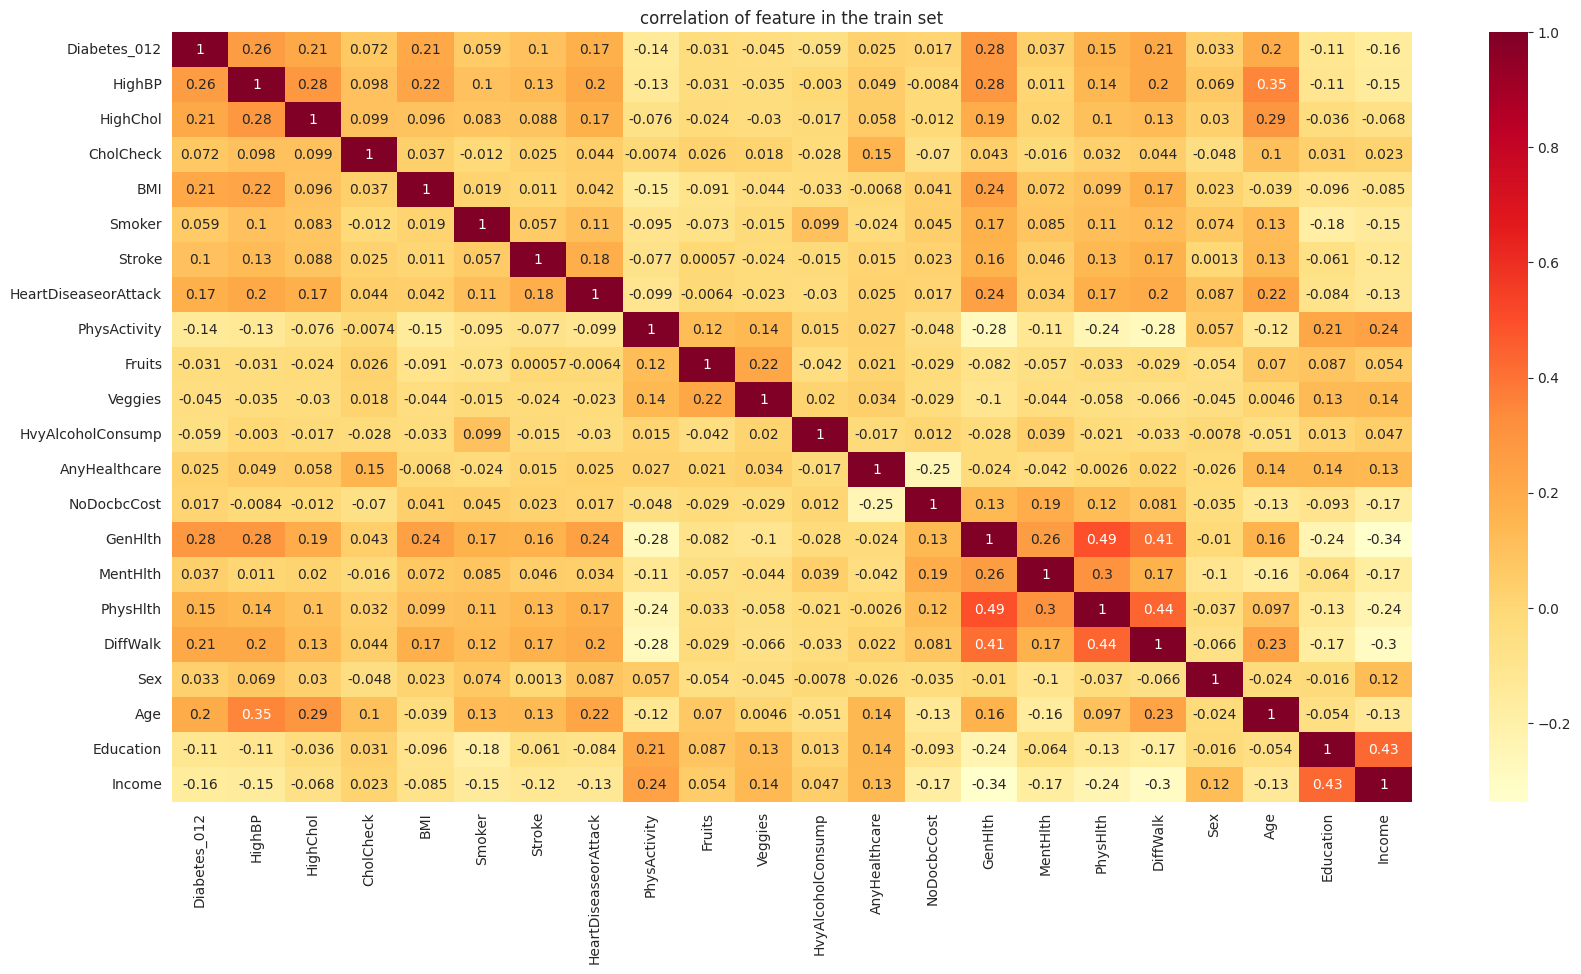

In [115]:
plt.figure(figsize = (20,10))
sns.heatmap(df_train.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature in the train set")

Dalla matrice di correlazione si nota che alcuni attributi hanno una correlazione minima, quasi nulla, con la feature target, di conseguenza vengono eliminati sia nel set di train che nel set di test. Sono i seguenti:


*   sex
*   MentHlth


*   NoDocbcCost
*   AnyHelthCare


*   hvyAlcoholConsump
*   Veggies


*   Fruits
*   Smoker

*   Cholcheck











In [116]:
# Lista degli attributi da eliminare
attributi_da_elim = ['Sex', 'MentHlth', 'NoDocbcCost', 'AnyHealthcare', 'HvyAlcoholConsump', 'Veggies', 'Fruits', 'Smoker', 'CholCheck']

# Elimina gli attributi specificati dal set di train
df_train = df_train.drop(columns=attributi_da_elim)

In [117]:
# Elimina gli attributi specificati dal set di test
df_test = df_test.drop(columns=attributi_da_elim)

Creazione di una copia indipendente del set di train

In [118]:
df_train_copia = df_train.copy()

Trasformo il dataset in modo che sia più leggibile e facilmente interpretabile

In [119]:
# Creazione del dizionario per l'automazione
rename_map = {
    'Diabetes_012': ('Diabete_Status', {0: 'No Diabete', 1: 'Diabete'}),
    'HighBP': ('High_blood', {0: 'No High', 1: 'High BP'}),
    'HighChol': ('High_Cholesterol', {0: 'No High Cholesterol', 1: 'High Cholesterol'}),
    'HeartDiseaseorAttack': ('Heart_Attack', {0: 'No', 1: 'yes'}),
    'GenHlth': ('Genral_Health', {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}),
    'DiffWalk': ('Difficulty_Walking', {0: 'No', 1: 'yes'}),
    'Education': ('Education_level', {1: 'Never Attended School', 2: 'Elementary', 3: 'Junior High School', 4: 'Senior High School', 5: 'Undergraduate Degree', 6: 'Master'}),
    'Income': ('Income_level', {1: 'Less Than $10,000', 2: 'Less Than $10,000', 3: 'Less Than $10,000', 4: 'Less Than $10,000', 5: 'Less Than $35,000', 6: 'Less Than $35,000', 7: 'Less Than $35,000', 8: '$75,000 or More'}),
    'Age': ('Age_level', {1: '18-24', 2: '25-30', 3: '31-35', 4: '36-40', 5: '41-46', 6: '47-51', 7: '52-56', 8: '57-61', 9: '62-66', 10: '67-71', 11: '72-76', 12: '77-81', 13: '82-86'})
}

# Ciclo for per ridefinire le colonne sfruttando il dizionario
for old_name, (new_name, map_dict) in rename_map.items():
    if map_dict:
        # Se c'è un dizionario per map(), lo utilizziamo
        df_train_copia[new_name] = df_train_copia[old_name].map(map_dict)
    else:
        # Altrimenti, semplicemente rinominiamo la colonna
        df_train_copia[new_name] = df_train_copia[old_name]

Verifico le relazioni tra i singoli attributi e la feature target Diabetes_Status

In [120]:
diabetes_bp = df_train_copia.groupby(['Diabete_Status', 'Age_level']).size().reset_index(name = 'Count')# raggruppa il DataFrame per le colonne 'Diabete_Status' e 'Age_level', creando gruppi basati sui valori unici presenti in queste colonne
print(diabetes_bp)

   Diabete_Status Age_level  Count
0         Diabete     18-24    119
1         Diabete     25-30    245
2         Diabete     31-35    378
3         Diabete     36-40    650
4         Diabete     41-46   1100
5         Diabete     47-51   1604
6         Diabete     52-56   2490
7         Diabete     57-61   3452
8         Diabete     62-66   4395
9         Diabete     67-71   4920
10        Diabete     72-76   4994
11        Diabete     77-81   3286
12        Diabete     82-86   2770
13     No Diabete     18-24   5279
14     No Diabete     25-30   6776
15     No Diabete     31-35   9478
16     No Diabete     36-40  11494
17     No Diabete     41-46  12517
18     No Diabete     47-51  12392
19     No Diabete     52-56  14384
20     No Diabete     57-61  15472
21     No Diabete     62-66  17013
22     No Diabete     67-71  17111
23     No Diabete     72-76  15044
24     No Diabete     77-81   9562
25     No Diabete     82-86   9721


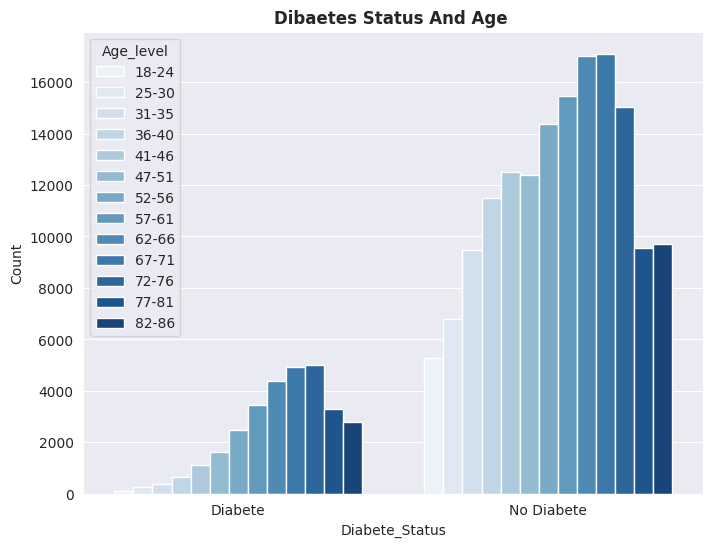

In [121]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabete_Status', y = 'Count', hue = 'Age_level', data =diabetes_bp , palette="Blues")
plt.title("Dibaetes Status And Age ",fontweight="bold")
plt.show()

In [122]:
diabetes_bp = df_train_copia.groupby(['Diabete_Status', 'BMI']).size().reset_index(name = 'Count')
print(diabetes_bp)

   Diabete_Status   BMI  Count
0         Diabete  12.0      1
1         Diabete  13.0      3
2         Diabete  14.0      6
3         Diabete  15.0      9
4         Diabete  16.0     27
..            ...   ...    ...
71     No Diabete  45.0    484
72     No Diabete  46.0    406
73     No Diabete  47.0    425
74     No Diabete  48.0    295
75     No Diabete  49.0    247

[76 rows x 3 columns]


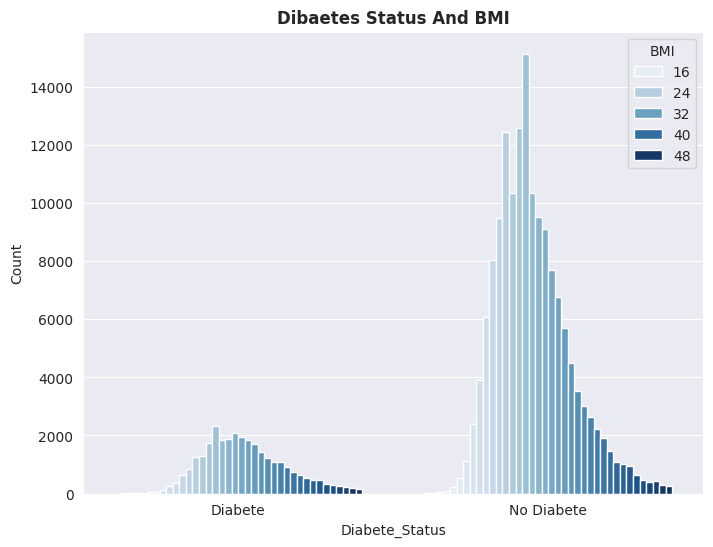

In [123]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabete_Status', y = 'Count', hue = 'BMI', data =diabetes_bp , palette="Blues")
plt.title("Dibaetes Status And BMI",fontweight="bold")
plt.show()

In [124]:
diabetes_bp = df_train_copia.groupby(['Diabete_Status', 'Genral_Health']).size().reset_index(name = 'Count')
print(diabetes_bp)

  Diabete_Status Genral_Health  Count
0        Diabete     Excellent   1401
1        Diabete          Fair   7520
2        Diabete          Good  12057
3        Diabete          Poor   2772
4        Diabete     Very Good   6662
5     No Diabete     Excellent  31686
6     No Diabete          Fair  13968
7     No Diabete          Good  45565
8     No Diabete          Poor   3961
9     No Diabete     Very Good  61056


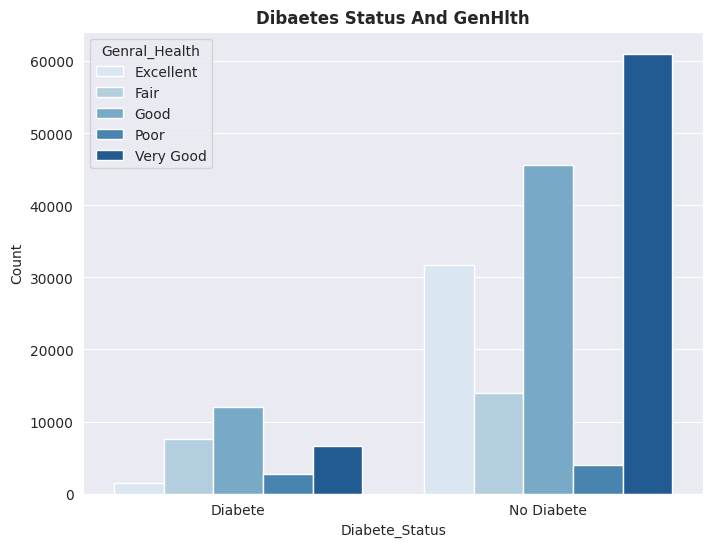

In [125]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabete_Status', y = 'Count', hue = 'Genral_Health', data =diabetes_bp , palette="Blues")
plt.title("Dibaetes Status And GenHlth",fontweight="bold")
plt.show()

In [126]:
diabetes_bp = df_train_copia.groupby(['Diabete_Status', 'PhysHlth']).size().reset_index(name = 'Count')
print(diabetes_bp)

   Diabete_Status  PhysHlth  Count
0         Diabete       0.0  16597
1         Diabete       1.0   1012
2         Diabete       2.0   1591
3         Diabete       3.0   1040
4         Diabete       4.0    560
..            ...       ...    ...
57     No Diabete      26.0     26
58     No Diabete      27.0     42
59     No Diabete      28.0    196
60     No Diabete      29.0     69
61     No Diabete      30.0   8161

[62 rows x 3 columns]


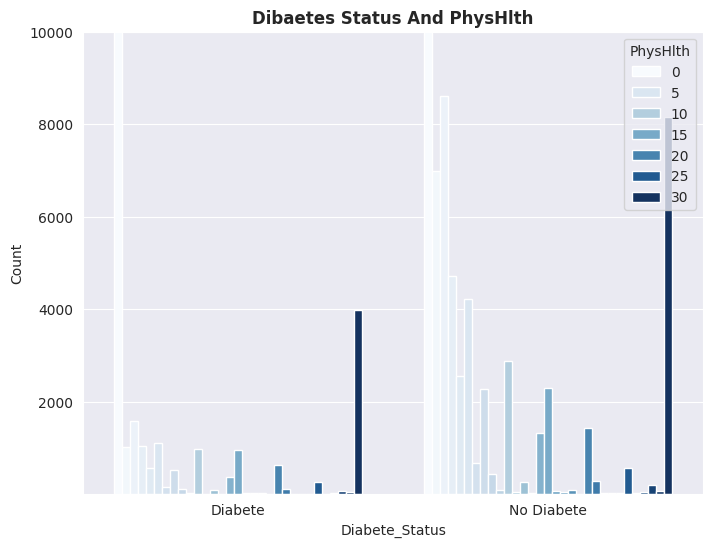

In [127]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabete_Status', y = 'Count', hue = 'PhysHlth', data =diabetes_bp , palette="Blues")
plt.title("Dibaetes Status And PhysHlth",fontweight="bold")
plt.ylim(14,10000)
plt.show()

In [128]:
diabetes_bp = df_train_copia.groupby(['Diabete_Status', 'Education_level']).size().reset_index(name = 'Count')
print(diabetes_bp)

   Diabete_Status        Education_level  Count
0         Diabete             Elementary    697
1         Diabete     Junior High School   1401
2         Diabete                 Master  10473
3         Diabete  Never Attended School     36
4         Diabete     Senior High School   8304
5         Diabete   Undergraduate Degree   9499
6      No Diabete             Elementary   1484
7      No Diabete     Junior High School   4038
8      No Diabete                 Master  75507
9      No Diabete  Never Attended School     64
10     No Diabete     Senior High School  33171
11     No Diabete   Undergraduate Degree  41972


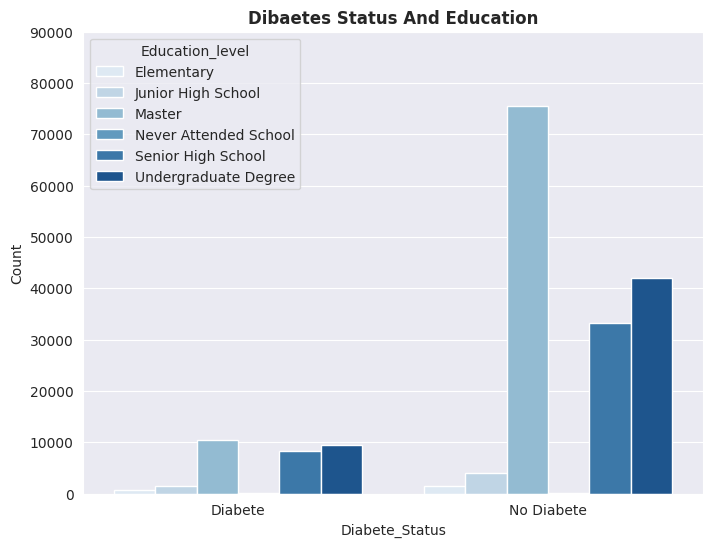

In [129]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabete_Status', y = 'Count', hue = 'Education_level', data =diabetes_bp , palette="Blues")
plt.title("Dibaetes Status And Education",fontweight="bold")
plt.ylim(0,90000)
plt.show()

In [130]:
diabetes_bp = df_train_copia.groupby(['Diabete_Status', 'Income_level']).size().reset_index(name = 'Count')
print(diabetes_bp)

  Diabete_Status       Income_level  Count
0        Diabete    $75,000 or More   3620
1        Diabete  Less Than $10,000   7128
2        Diabete  Less Than $35,000  14558
3     No Diabete    $75,000 or More  24036
4     No Diabete  Less Than $10,000  19601
5     No Diabete  Less Than $35,000  64982


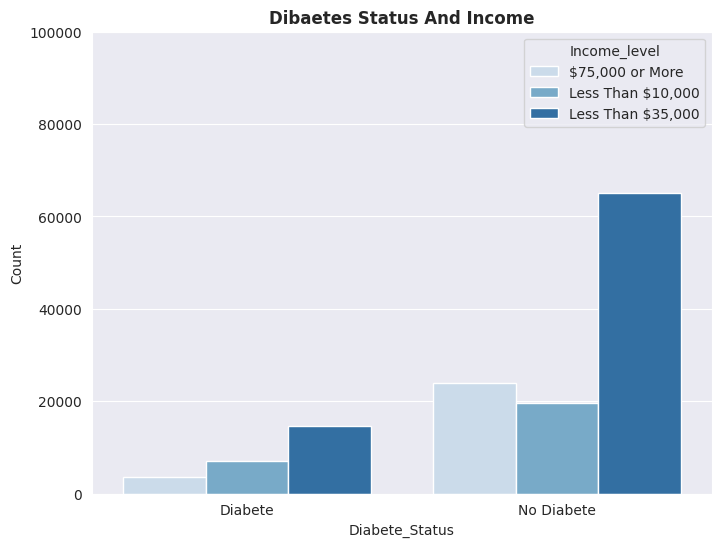

In [131]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Diabete_Status', y = 'Count', hue = 'Income_level', data =diabetes_bp , palette="Blues")
plt.title("Dibaetes Status And Income",fontweight="bold")
plt.ylim(0,100000)
plt.show()

verifico se ci sono degli outlier

<ipython-input-132-86b244800601>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-132-86b244800601>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-132-86b244800601>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-132-86b244800601>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-132-86b244800601>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

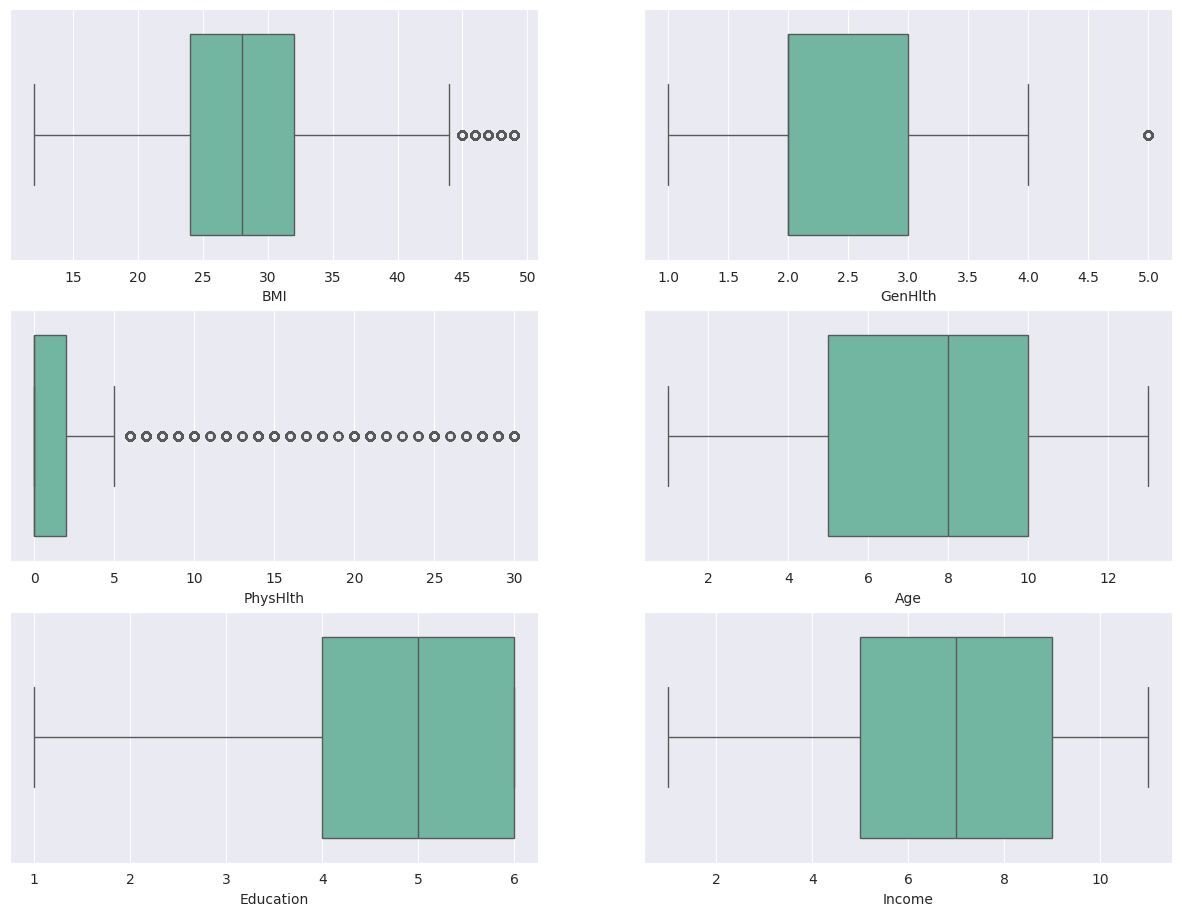

In [132]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df_train ,palette='Set2')
plt.show()

DATA CLEANING

In [133]:
df_test.isnull().sum() #restituisce una serie che mostra il numero totale di valori mancanti per ciascuna colonna

Diabetes_012            0
HighBP                  0
HighChol                0
BMI                     0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
GenHlth                 0
PhysHlth                0
DiffWalk                0
Age                     0
Education               0
Income                  0
dtype: int64

In [134]:
df_train.isnull().sum()

Diabetes_012              0
HighBP                  188
HighChol                186
BMI                       0
Stroke                  186
HeartDiseaseorAttack    189
PhysActivity            185
GenHlth                 186
PhysHlth                187
DiffWalk                188
Age                     188
Education               188
Income                  187
dtype: int64

Correzzione dei valori nulli

In [135]:
righe_con_valori_mancanti = df_train[df_train.isnull().any(axis=1)] #seleziono gli indici di riga he presentano valori mancanti
print(righe_con_valori_mancanti)


        Diabetes_012  HighBP  HighChol   BMI  Stroke  HeartDiseaseorAttack  \
51               0.0     0.0       0.0  34.0     0.0                   0.0   
455              1.0     0.0       0.0  24.0     0.0                   0.0   
474              0.0     0.0       1.0  25.0     NaN                   1.0   
513              0.0     0.0       0.0  33.0     0.0                   0.0   
590              0.0     0.0       0.0  23.0     NaN                   0.0   
...              ...     ...       ...   ...     ...                   ...   
188965           0.0     0.0       0.0  21.0     1.0                   1.0   
188992           0.0     0.0       1.0  19.0     0.0                   0.0   
189029           0.0     0.0       1.0  27.0     0.0                   0.0   
189084           0.0     0.0       1.0  24.0     0.0                   0.0   
189100           0.0     NaN       0.0  28.0     0.0                   0.0   

        PhysActivity  GenHlth  PhysHlth  DiffWalk   Age  Educat

In [136]:
# Calcoliamo la moda per ciascuna colonna
mode_values = df_train.mode().iloc[0]

# Sostituiamo i valori mancanti con la moda
df_train.fillna(mode_values, inplace=True)

# Verifichiamo se ci sono ancora dati mancanti
print("Dati mancanti dopo l'imputazione con la moda:\n", df_train.isnull().sum())
# Sostituisco dei valori mancanti con la moda della colonna

Dati mancanti dopo l'imputazione con la moda:
 Diabetes_012            0
HighBP                  0
HighChol                0
BMI                     0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
GenHlth                 0
PhysHlth                0
DiffWalk                0
Age                     0
Education               0
Income                  0
dtype: int64


In [137]:
duplicates = df_train.duplicated() #Verifica della presenza di duplicati nel set di train
print (duplicates.sum())

52346


In [138]:
duplicates = df_test.duplicated()# Verifica della presenza di duplicati nel set di test
print (duplicates.sum())

6694


Fase di Data Transformation e/o Reduction

In [139]:
# Definisco gli attributi dipendenti e indipendenti nel set di train
X_train=df_train.drop(["Diabetes_012"],axis=1)
y_train=df_train["Diabetes_012"]


# Impostazione di uno standard scalar per le feature e successiva analisi
col_names = list(X_train.columns)
s_scaler = preprocessing.StandardScaler()
X_train_scaled= s_scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,186834.0,-3.270640e-18,1.000003,-0.841544,-0.841544,-0.841544,1.188292,1.188292
HighChol,186834.0,3.901950e-17,1.000003,-0.818997,-0.818997,-0.818997,1.221005,1.221005
BMI,186834.0,1.734200e-17,1.000003,-2.821240,-0.790290,-0.113307,0.563676,3.440855
Stroke,186834.0,2.312266e-17,1.000003,-0.200709,-0.200709,-0.200709,-0.200709,4.982332
HeartDiseaseorAttack,186834.0,-2.110704e-17,1.000003,-0.307686,-0.307686,-0.307686,-0.307686,3.250068
PhysActivity,186834.0,-4.054072e-17,1.000003,-1.901467,0.525910,0.525910,0.525910,0.525910
GenHlth,186834.0,1.470267e-16,1.000003,-1.434382,-0.458250,-0.458250,0.517883,2.470149
PhysHlth,186834.0,-5.552482e-18,1.000003,-0.450135,-0.450135,-0.450135,-0.205071,3.225830
DiffWalk,186834.0,-2.411146e-17,1.000003,-0.418097,-0.418097,-0.418097,-0.418097,2.391788
Age,186834.0,-4.525653e-17,1.000003,-2.122714,-0.887369,0.039140,0.656812,1.583321


# Machine Learning

In [140]:
# Definisco gli attributi dipendenti e indipendenti nel set di test
X_test=df_test.drop(["Diabetes_012"],axis=1)
y_test=df_test["Diabetes_012"]


# Impostazione di uno standard scalar per le feature e successiva analisi
col_names = list(X_test.columns)
s_scaler = preprocessing.StandardScaler()
X_test_scaled = s_scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)
X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,46799.0,-1.401378e-16,1.000011,-0.851725,-0.851725,-0.851725,1.174087,1.174087
HighChol,46799.0,1.761212e-17,1.000011,-0.819641,-0.819641,-0.819641,1.220047,1.220047
BMI,46799.0,-2.459624e-17,1.000011,-2.796977,-0.778943,-0.106265,0.566413,3.425294
Stroke,46799.0,-1.852309e-17,1.000011,-0.202302,-0.202302,-0.202302,-0.202302,4.943100
HeartDiseaseorAttack,46799.0,-1.973772e-18,1.000011,-0.306297,-0.306297,-0.306297,-0.306297,3.264804
PhysActivity,46799.0,4.554858e-17,1.000011,-1.876604,0.532877,0.532877,0.532877,0.532877
GenHlth,46799.0,7.181493e-17,1.000011,-1.436972,-0.461333,-0.461333,0.514306,2.465584
PhysHlth,46799.0,-1.654932e-17,1.000011,-0.453863,-0.453863,-0.453863,-0.210446,3.197395
DiffWalk,46799.0,4.403030e-17,1.000011,-0.426407,-0.426407,-0.426407,-0.426407,2.345178
Age,46799.0,4.251201e-17,1.000011,-2.125000,-0.892440,0.031980,0.648260,1.572680


Box Plot Feature Scaled

<ipython-input-141-ba3a059a1995>:4: UserWarning:


The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.



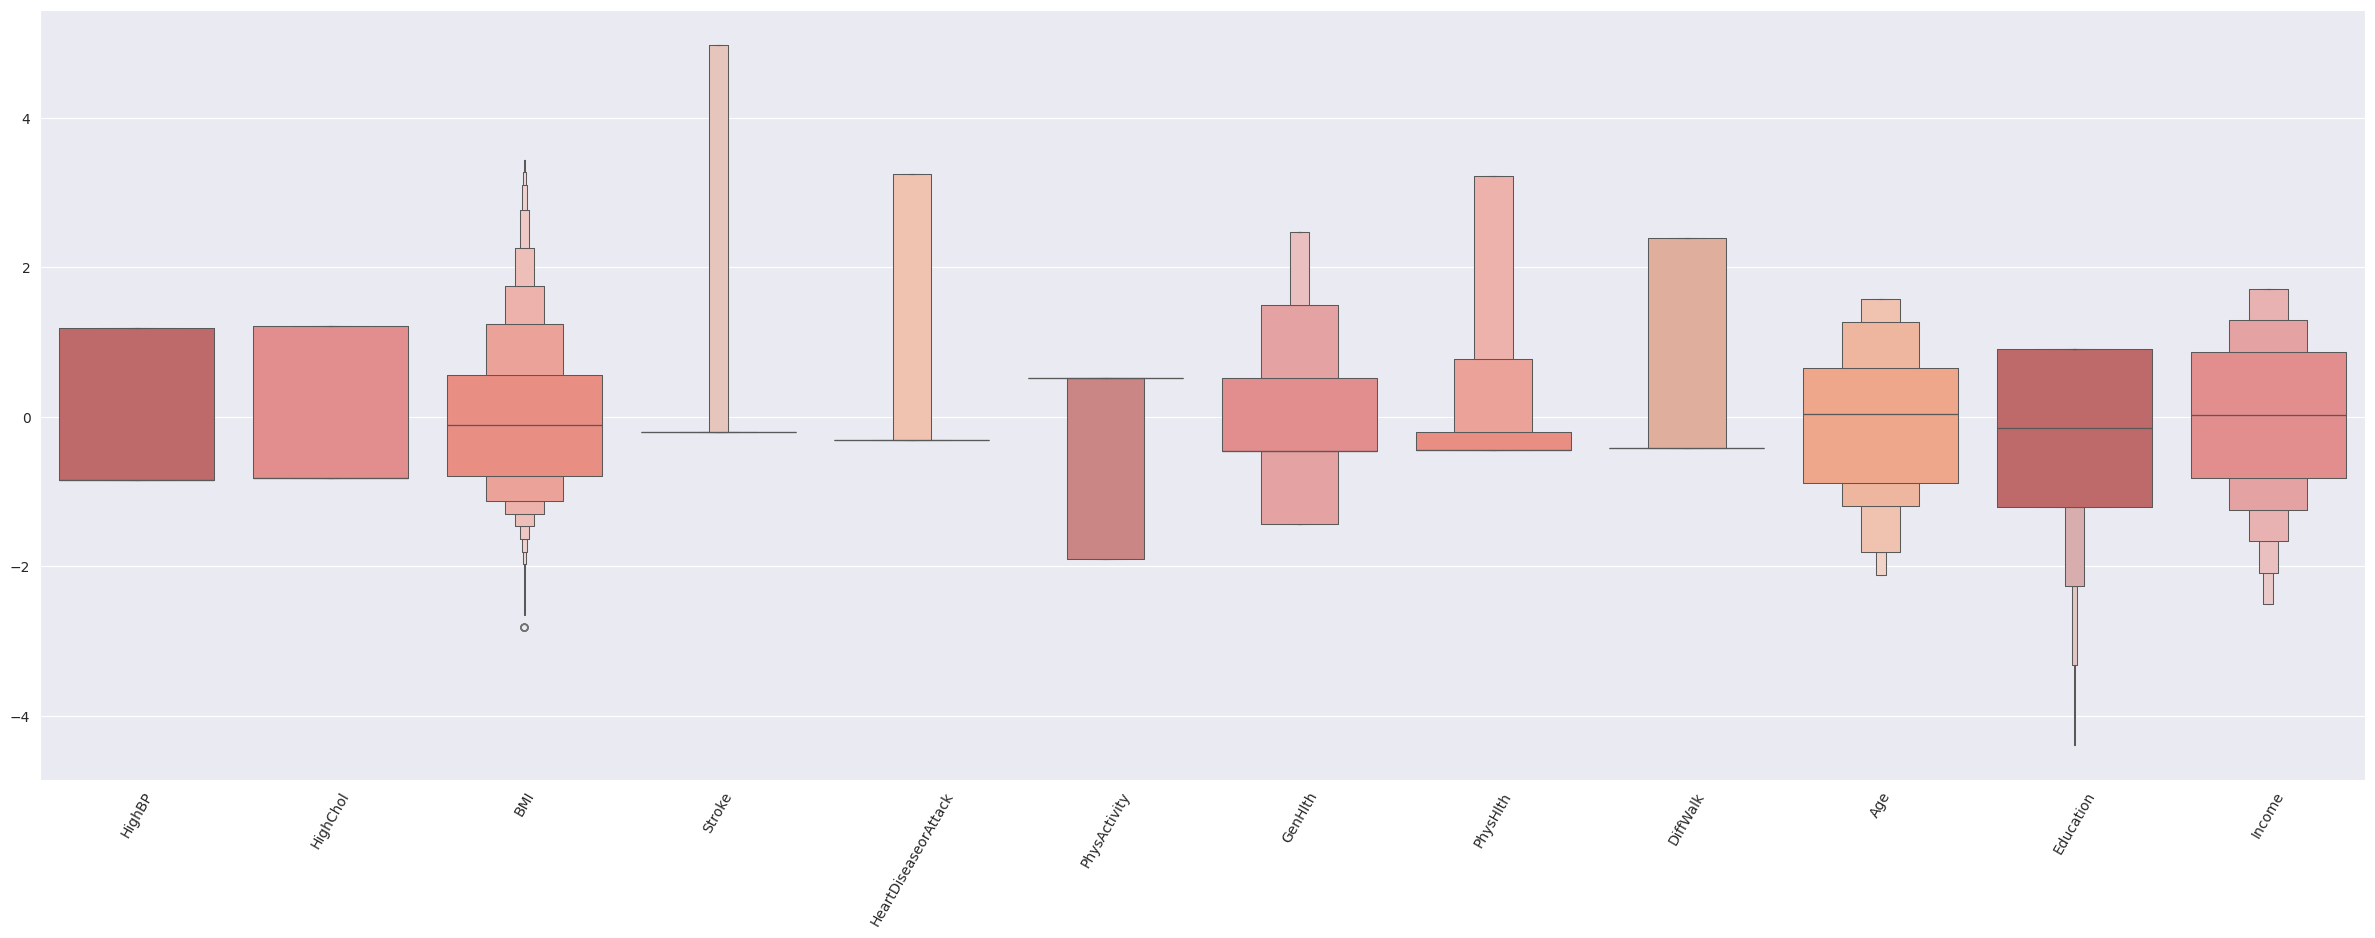

In [141]:
#Plot delle feature scalate, del train set, usando il boxplot
colors =["#CD5C5C","#F08080","#FA8072","#E9967A","#FFA07A"]
plt.figure(figsize=(30,10))
sns.boxenplot(data = X_train_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

<Axes: >

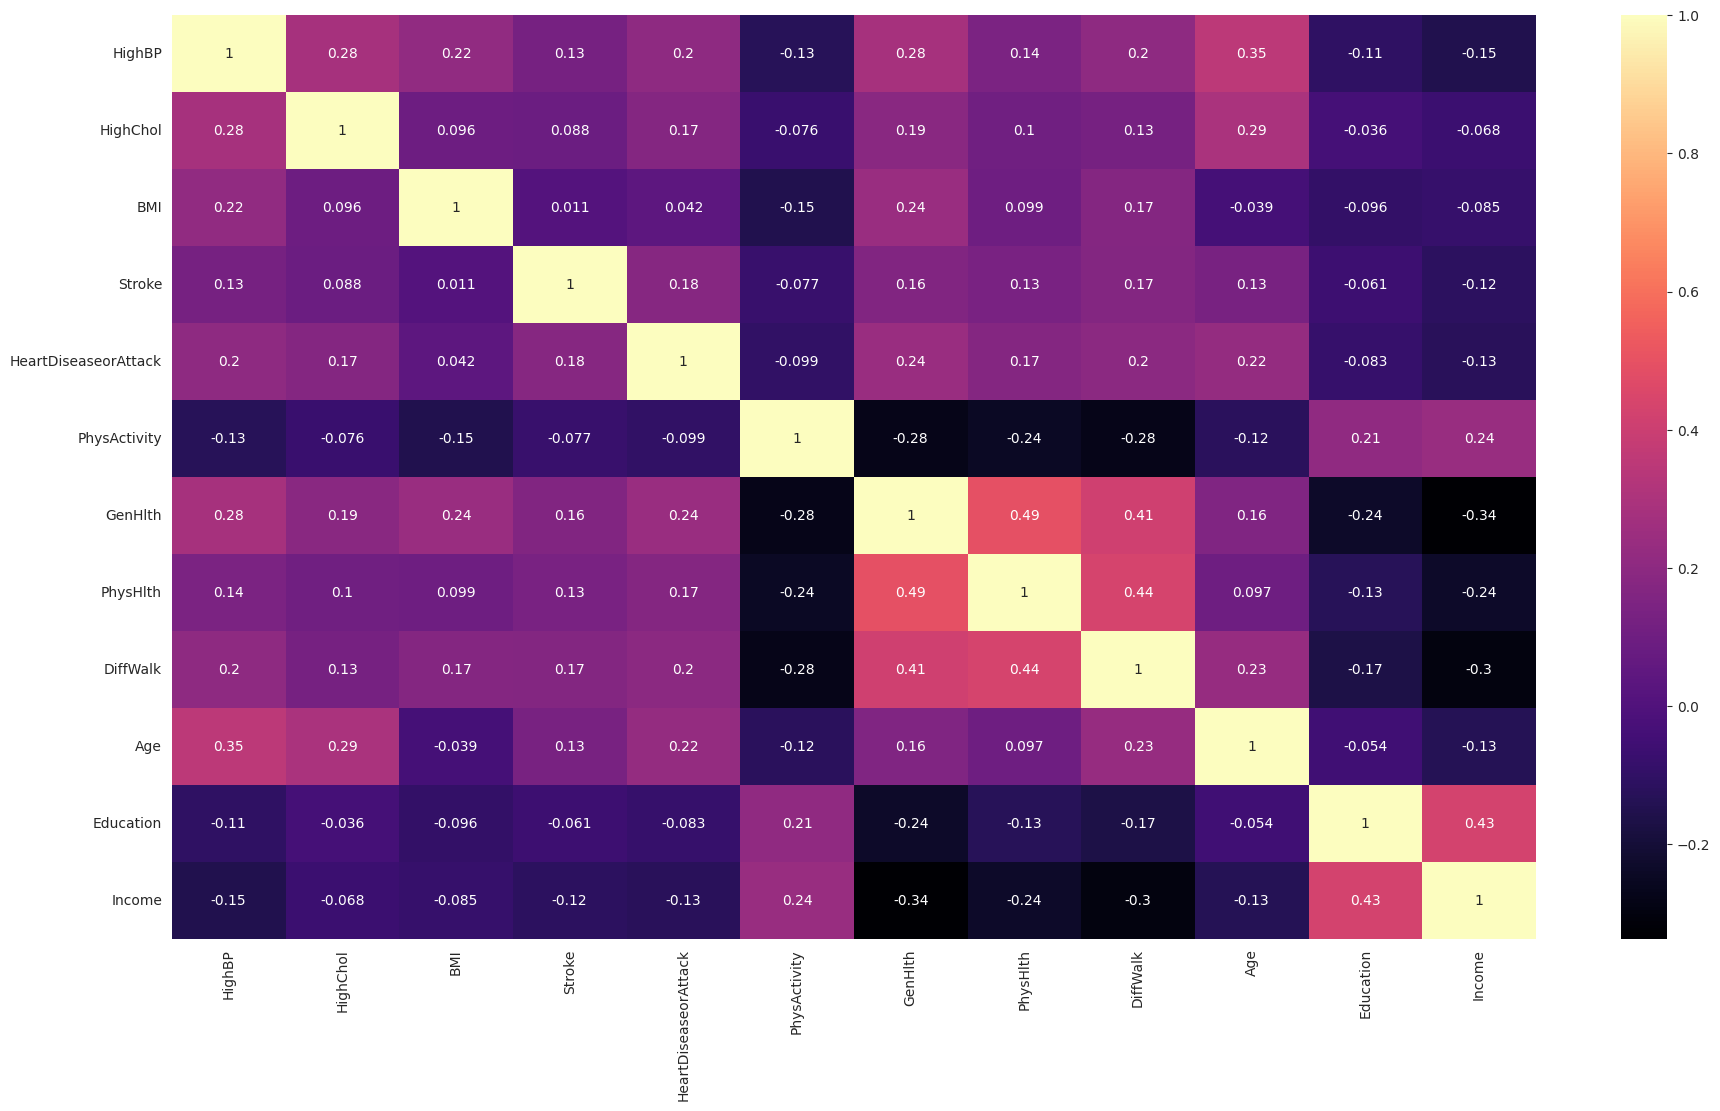

In [142]:
# Matrice di correlazione con i valori normalizzati
plt.figure(figsize=(22,12))
sns.heatmap(X_train_scaled.corr(), annot =True, cmap='magma')

Algoritmi di classificazione utilizzati per lo studio



*   Logistic Regresssion
*   Decision Tree


*   Random Forest
*   Naive Bayes Model





In [143]:
# Inizializzazione dei modelli di machine learning con parametri ottimizzati
logistic_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=80)
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
naive_bayes_model = GaussianNB()


# Creazione di un dizionario per i modelli
models = {
    'Logistic Regression': logistic_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'Naive Bayes Model': naive_bayes_model,

}


# Addestramento e valutazione dei modelli con aggiunta di precision, recall e F1-score
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc}')
    # Calcolo della precision, recall e F1-score
    print(f'{name} Classification Report:\n', classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8403384687707002
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     39102
         1.0       0.55      0.17      0.26      7697

    accuracy                           0.84     46799
   macro avg       0.70      0.57      0.58     46799
weighted avg       0.81      0.84      0.80     46799

Decision Tree Accuracy: 0.8393128058291844
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     39102
         1.0       0.53      0.19      0.28      7697

    accuracy                           0.84     46799
   macro avg       0.70      0.58      0.59     46799
weighted avg       0.80      0.84      0.81     46799

Random Forest Accuracy: 0.8421761148742495
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.98   

Curve ROC, Confusion Matrix, Classification Report e Learning Curves

-----------------------------------------------------------------Logistic Regression-----------------------------------------------------------------


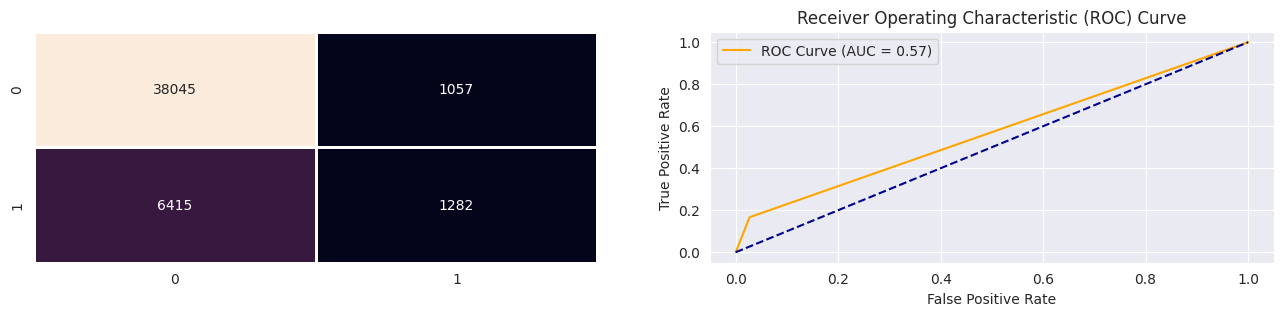

-----------------------------------------------------------------Decision Tree-----------------------------------------------------------------


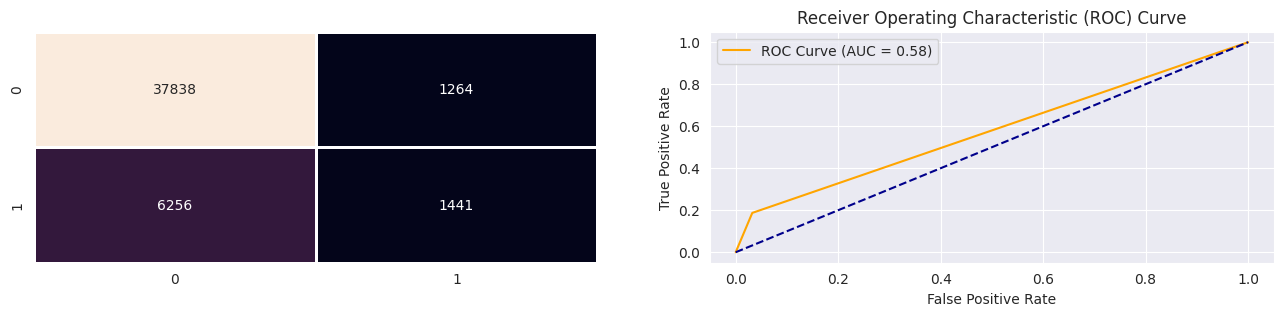

-----------------------------------------------------------------Random Forest-----------------------------------------------------------------


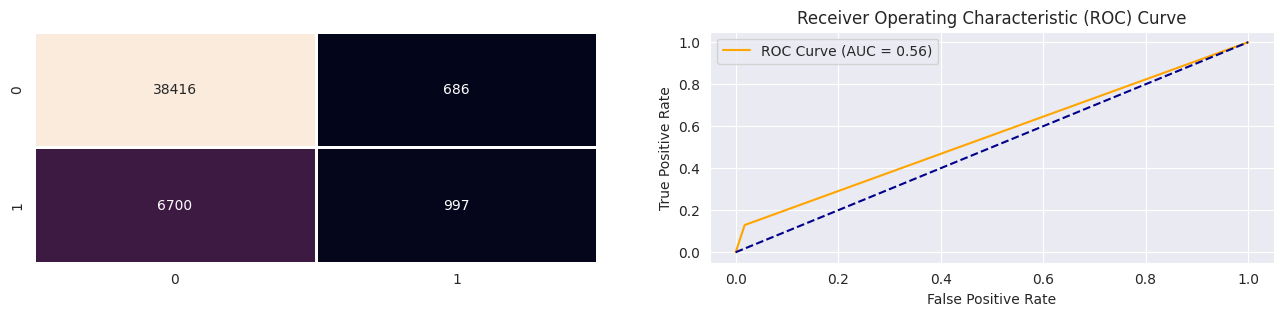

-----------------------------------------------------------------Naive Bayes Model-----------------------------------------------------------------


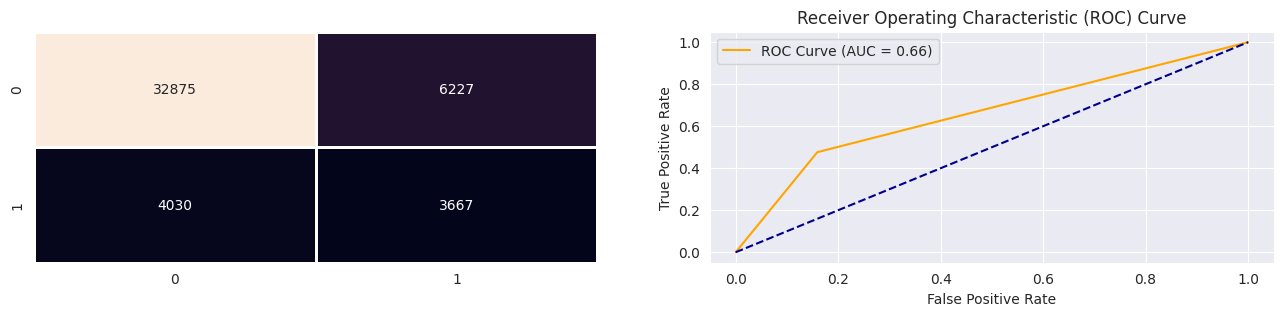

In [144]:
for x in models:
    print('-'*65 + x + '-'*65)
    algoritmo = models[x]
    y_pred = algoritmo.predict(X_test_scaled)
    arg_test = {'y_true': y_test, 'y_pred': y_pred}
    cf_matrix = confusion_matrix(**arg_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)  # Calcolo dell'AUC

    def plot_roc_curve(fpr, tpr, roc_auc):
        plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Aggiunta di AUC nella legenda
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()

    fig, axs = plt.subplots(ncols=2, figsize=(16, 3))
    sns.heatmap(cf_matrix, annot=True, cbar=False, ax=axs[0], linewidths=1, fmt='g')
    plot_roc_curve(fpr, tpr, roc_auc)
    plt.show()

In [145]:
'''
for x in models:

    print('-'*65+x+'-'*65)
    algoritmo = models[x]
    y_pred = algoritmo.predict(X_test_scaled)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    cf_matrix = confusion_matrix(**arg_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr) #definizione valore AUC
    def plot_roc_curve(fpr, tpr):
        #plt.plot(fpr, tpr, color='orange', label='ROC')
        plt.plot(fpr, tpr, color='orange', label='ROC', AUC = {roc_auc:.2f}') #Comando per aggiungere valore AUC al grafico
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()

    fig, axs = plt.subplots(ncols=2, figsize=(16,3))
    sns.heatmap(cf_matrix, annot=True, cbar=False, ax=axs[0], linewidths=1, fmt='g')
    plot_roc_curve(fpr, tpr)
    plt.show()
    plot_learning_curves(X_train_scaled, y_train, X_test_scaled, y_test, algoritmo, scoring='accuracy')
    plt.show()
    print( Fore.GREEN + '\n  Classification Report \n ')
    print(classification_report(**arg_test))
'''

"\nfor x in models:\n\n    print('-'*65+x+'-'*65)\n    algoritmo = models[x]\n    y_pred = algoritmo.predict(X_test_scaled)\n    arg_test = {'y_true':y_test, 'y_pred':y_pred}\n    cf_matrix = confusion_matrix(**arg_test)\n    fpr, tpr, thresholds = roc_curve(y_test, y_pred)\n    roc_auc = auc(fpr, tpr) #definizione valore AUC\n    def plot_roc_curve(fpr, tpr):\n        #plt.plot(fpr, tpr, color='orange', label='ROC')\n        plt.plot(fpr, tpr, color='orange', label='ROC', AUC = {roc_auc:.2f}') #Comando per aggiungere valore AUC al grafico\n        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')\n        plt.xlabel('False Positive Rate')\n        plt.ylabel('True Positive Rate')\n        plt.title('Receiver Operating Characteristic (ROC) Curve')\n        plt.legend()\n\n    fig, axs = plt.subplots(ncols=2, figsize=(16,3))\n    sns.heatmap(cf_matrix, annot=True, cbar=False, ax=axs[0], linewidths=1, fmt='g')\n    plot_roc_curve(fpr, tpr)\n    plt.show()\n    plot_learning_curv

Avendo notato che i diversi modelli non riescono a predire correttamente la classe dei diabetici, essendo minoritaria, applichiamo una tecnica per bilanciare le due classe.

In [146]:
from imblearn.over_sampling import SMOTE

# Creiamo un oggetto SMOTE per l'oversampling
smote = SMOTE(random_state=42)

# Applichiamo l'oversampling al Train Set
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Ora standardizziamo sia il training che il test set dopo l'oversampling del training set
scaler = StandardScaler()

# Adattiamo lo scaler solo al training set oversampled e trasformiamo entrambi i set
X_train_scaled_2 = scaler.fit_transform(X_train_oversampled)
X_test_scaled_2 = scaler.transform(X_test)

# Convertiamo in DataFrame per una migliore manipolazione e interpretazione
col_names = list(X_train.columns)
X_train_scaled2 = pd.DataFrame(X_train_scaled_2, columns=col_names)
X_test_scaled2 = pd.DataFrame(X_test_scaled_2, columns=col_names)

from collections import Counter

print('Distribuzione delle classi prima di SMOTE:', Counter(y_train))
print('Distribuzione delle classi dopo SMOTE:', Counter(y_train_oversampled))

Distribuzione delle classi prima di SMOTE: Counter({0.0: 156398, 1.0: 30436})
Distribuzione delle classi dopo SMOTE: Counter({0.0: 156398, 1.0: 156398})


In [147]:
# Inizializzazione dei modelli di machine learning con parametri ottimizzati
logistic_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=80)
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
naive_bayes_model = GaussianNB()


# Creazione di un dizionario per i modelli
models = {
    'Logistic Regression': logistic_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'Naive Bayes Model': naive_bayes_model,

}


# Addestramento e valutazione dei modelli con aggiunta di precision, recall e F1-score
for name, model in models.items():
    model.fit(X_train_scaled2, y_train_oversampled)
    y_pred = model.predict(X_test_scaled2)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc}')
    # Calcolo della precision, recall e F1-score
    print(f'{name} Classification Report:\n', classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7178785871492981
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     39102
         1.0       0.34      0.75      0.47      7697

    accuracy                           0.72     46799
   macro avg       0.64      0.73      0.64     46799
weighted avg       0.84      0.72      0.75     46799

Decision Tree Accuracy: 0.791918630739973
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.84      0.87     39102
         1.0       0.40      0.56      0.47      7697

    accuracy                           0.79     46799
   macro avg       0.65      0.70      0.67     46799
weighted avg       0.82      0.79      0.80     46799

Random Forest Accuracy: 0.7916408470266458
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.84    

-----------------------------------------------------------------Logistic Regression-----------------------------------------------------------------


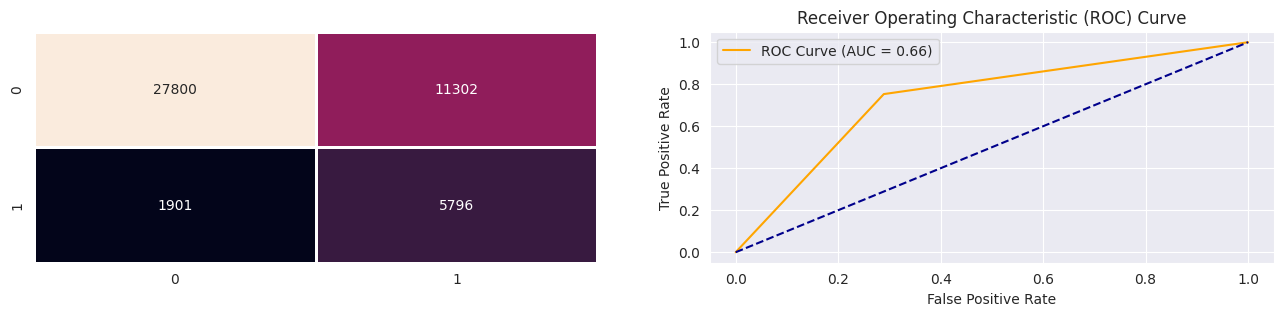

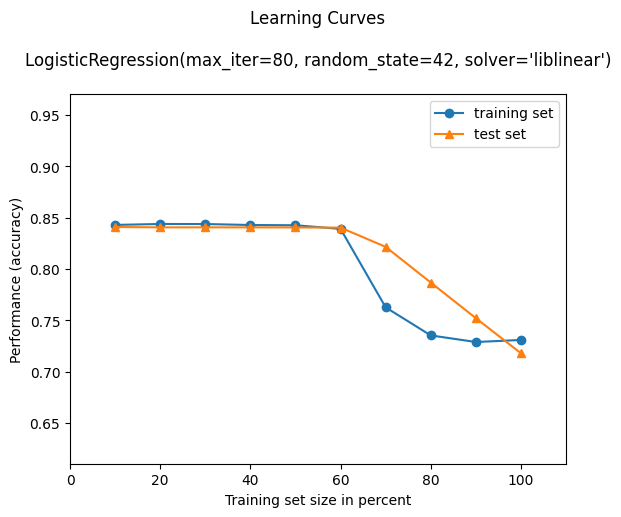


  Classification Report 
 
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     39102
         1.0       0.34      0.75      0.47      7697

    accuracy                           0.72     46799
   macro avg       0.64      0.73      0.64     46799
weighted avg       0.84      0.72      0.75     46799

-----------------------------------------------------------------Decision Tree-----------------------------------------------------------------


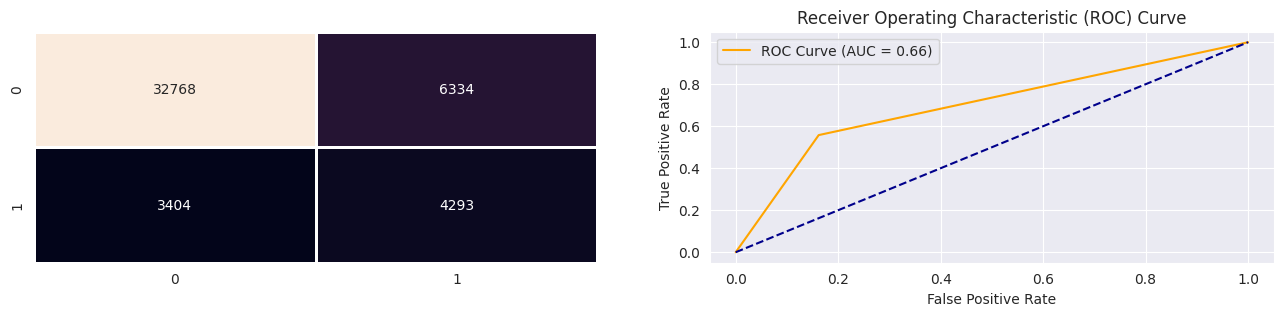

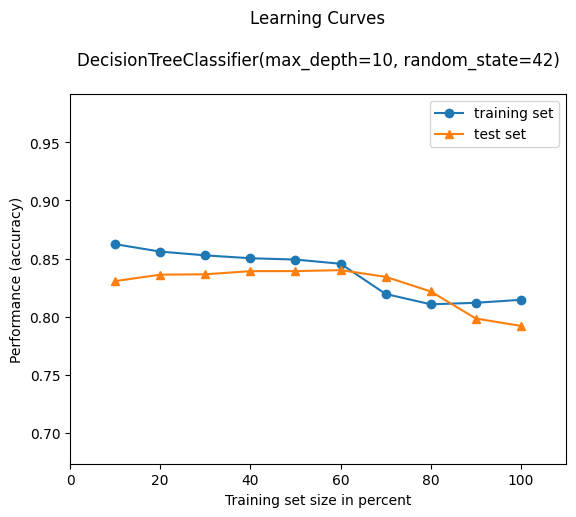


  Classification Report 
 
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87     39102
         1.0       0.40      0.56      0.47      7697

    accuracy                           0.79     46799
   macro avg       0.65      0.70      0.67     46799
weighted avg       0.82      0.79      0.80     46799

-----------------------------------------------------------------Random Forest-----------------------------------------------------------------


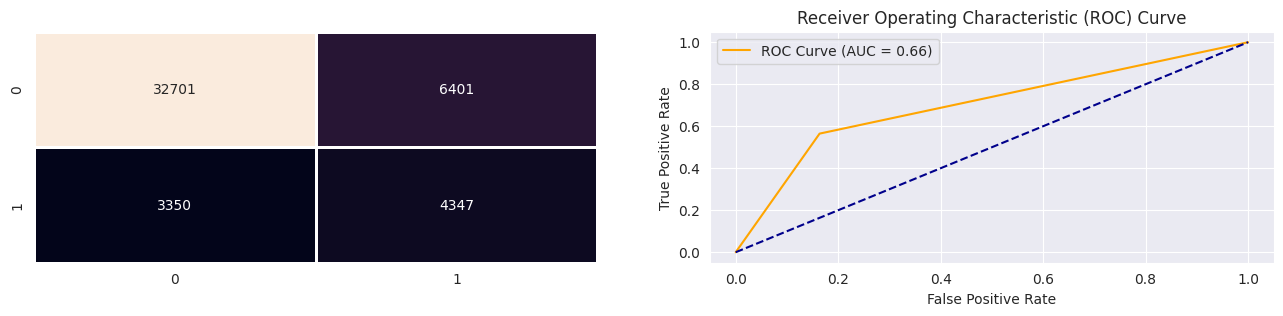

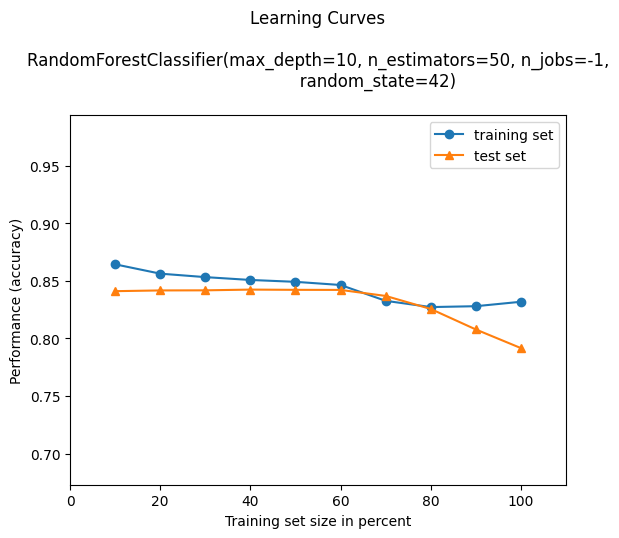


  Classification Report 
 
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87     39102
         1.0       0.40      0.56      0.47      7697

    accuracy                           0.79     46799
   macro avg       0.66      0.70      0.67     46799
weighted avg       0.82      0.79      0.80     46799

-----------------------------------------------------------------Naive Bayes Model-----------------------------------------------------------------


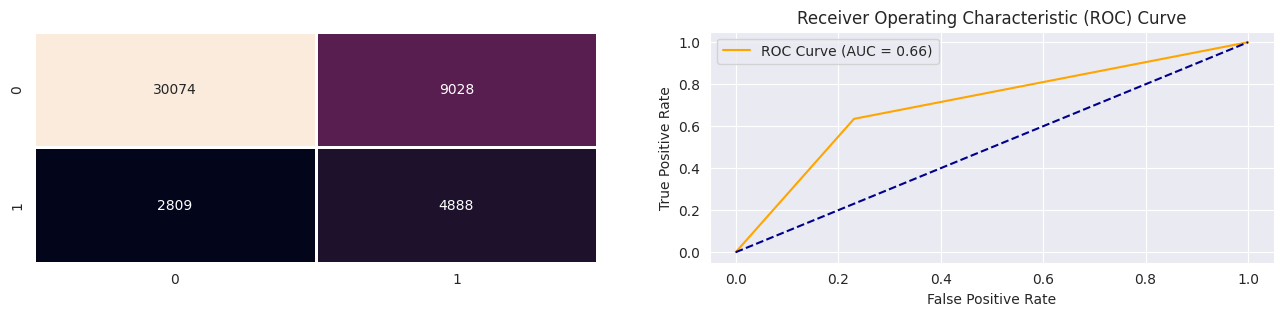

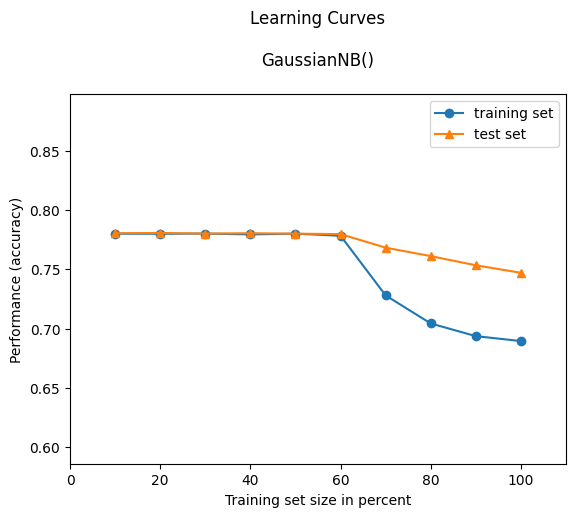


  Classification Report 
 
              precision    recall  f1-score   support

         0.0       0.91      0.77      0.84     39102
         1.0       0.35      0.64      0.45      7697

    accuracy                           0.75     46799
   macro avg       0.63      0.70      0.64     46799
weighted avg       0.82      0.75      0.77     46799



In [148]:
## Visualizzazione dei grafici delle performance dei modelli di apprendimento
#

for x in models:

    print('-'*65+x+'-'*65)
    algoritmo = models[x]
    y_pred = algoritmo.predict(X_test_scaled2)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    cf_matrix = confusion_matrix(**arg_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    def plot_roc_curve(fpr, tpr):
        plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()

    fig, axs = plt.subplots(ncols=2, figsize=(16,3))
    sns.heatmap(cf_matrix, annot=True, cbar=False, ax=axs[0], linewidths=1, fmt='g')
    plot_roc_curve(fpr, tpr)
    plt.show()
    plot_learning_curves(X_train_scaled2, y_train_oversampled, X_test_scaled2, y_test, algoritmo, scoring='accuracy')
    plt.show()
    print( Fore.GREEN + '\n  Classification Report \n ')
    print(classification_report(**arg_test))

**FEATURE SELECTION**

[0.01452579 0.01603561 0.02332696 0.45021945 0.00830451 0.01383148
 0.01049356 0.05243525 0.16837043 0.01126935 0.16828697 0.06290065]


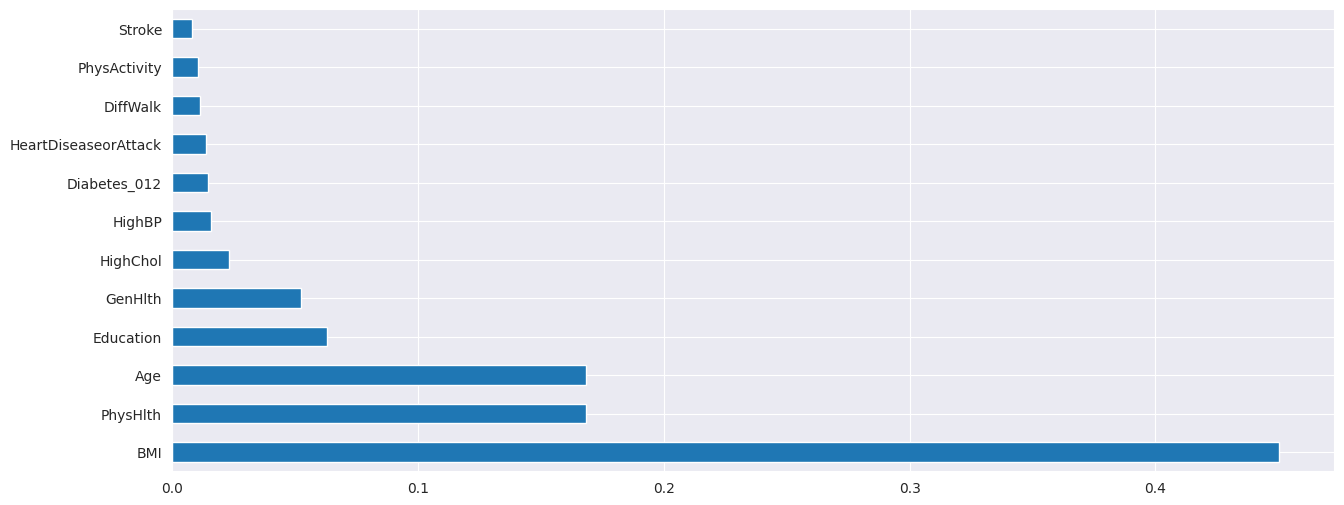

In [149]:
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")

x_sel = df_train.iloc[:, :-1]
y_sel = df_train.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(x_sel,y_sel)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x_sel.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

[0.01663773 0.02079959 0.02834325 0.42530579 0.01097757 0.01717791
 0.01167153 0.06614626 0.14326169 0.01025605 0.1854586  0.06396402]


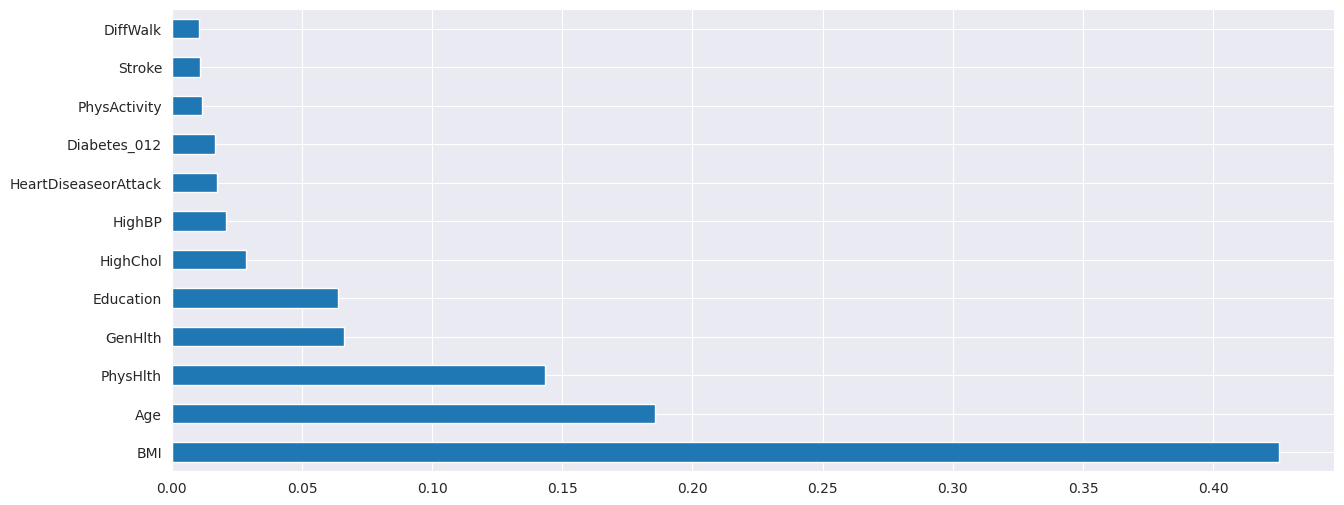

In [150]:
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")

x_sel = df_test.iloc[:, :-1]
y_sel = df_test.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(x_sel,y_sel)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x_sel.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

Dal grafico sopra riportato è possibile notare come le tre feature con maggiore importanza sono: BMI, Age e PhysHlth. Scegliamo di mantenere all'interno del dataset di training degli algoritmi solo queste tre feature valutandone l'accuratezza di ognuno dopo questa fase.

In [151]:
# Isoliamo le variabili dipendenti (BMI, Age, PhysHlth)
# dalla variabile indipendente (target Death_event).


x_train=df_train[["BMI","Age","PhysHlth"]].copy()
x_test=df_test[["BMI","Age","PhysHlth"]].copy()



# Normalizzazione dei dati

# Creiamo un oggetto SMOTE per l'oversampling
smote = SMOTE(random_state=42)

# Applichiamo l'oversampling al Train Set
X_train_oversampled2, y_train_oversampled2 = smote.fit_resample(x_train, y_train)

# Ora standardizziamo sia il training che il test set dopo l'oversampling del training set
scaler = StandardScaler()

# Adattiamo lo scaler solo al training set oversampled e trasformiamo entrambi i set
X_train_scaled3 = scaler.fit_transform(X_train_oversampled2)
X_test_scaled3 = scaler.transform(x_test)

# Convertiamo in DataFrame per una migliore manipolazione e interpretazione
col_names = list(x_train.columns)
X_train_scaled4 = pd.DataFrame(X_train_scaled3, columns=col_names)
X_test_scaled4 = pd.DataFrame(X_test_scaled3, columns=col_names)

from collections import Counter

print('Distribuzione delle classi prima di SMOTE:', Counter(y_train))
print('Distribuzione delle classi dopo SMOTE:', Counter(y_train_oversampled))


Distribuzione delle classi prima di SMOTE: Counter({0.0: 156398, 1.0: 30436})
Distribuzione delle classi dopo SMOTE: Counter({0.0: 156398, 1.0: 156398})


In [152]:
# Inizializzazione dei modelli di machine learning con parametri ottimizzati
logistic_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=80)
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
naive_bayes_model = GaussianNB()


# Creazione di un dizionario per i modelli
models2 = {
    'Logistic Regression': logistic_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'Naive Bayes Model': naive_bayes_model

}


# Addestramento e valutazione dei modelli con aggiunta di precision, recall e F1-score
for name, model in models2.items():
    model.fit(X_train_scaled4, y_train_oversampled2)
    y_pred = model.predict(X_test_scaled4)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc}')
    # Calcolo della precision, recall e F1-score
    print(f'{name} Classification Report:\n', classification_report(y_test, y_pred))



Logistic Regression Accuracy: 0.6713177632000684
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.66      0.77     39102
         1.0       0.29      0.71      0.41      7697

    accuracy                           0.67     46799
   macro avg       0.61      0.69      0.59     46799
weighted avg       0.82      0.67      0.71     46799

Decision Tree Accuracy: 0.6722793222077394
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.67      0.77     39102
         1.0       0.29      0.71      0.41      7697

    accuracy                           0.67     46799
   macro avg       0.61      0.69      0.59     46799
weighted avg       0.82      0.67      0.71     46799

Random Forest Accuracy: 0.6665313361396611
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.66   

-----------------------------------------------------------------Logistic Regression-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



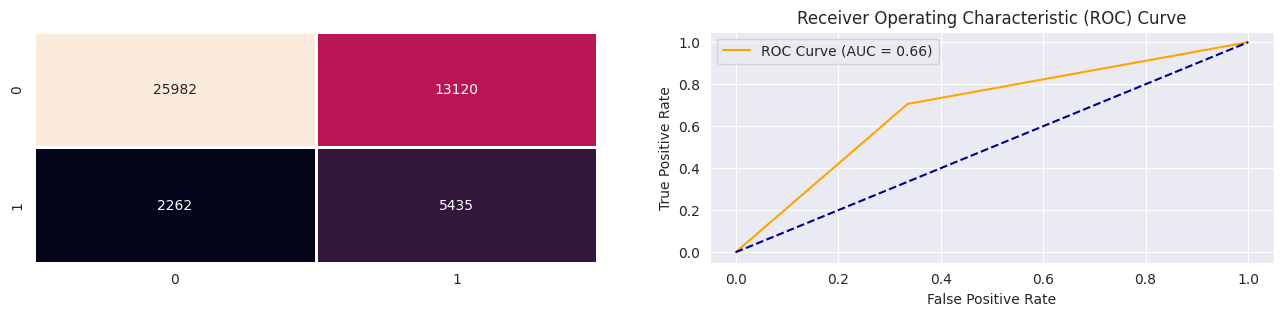

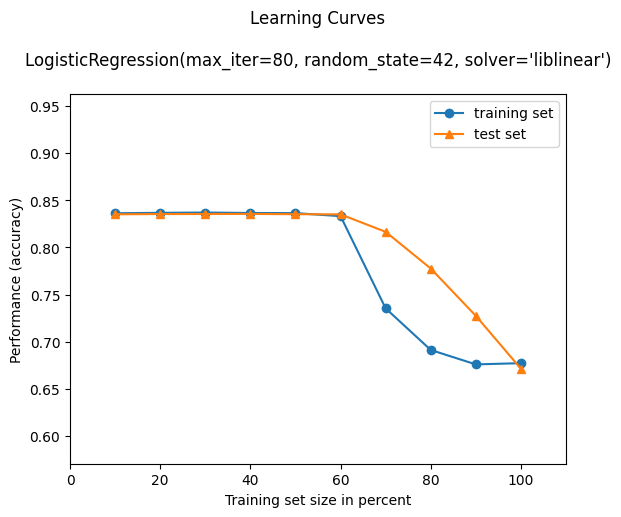


  Classification Report 
 
              precision    recall  f1-score   support

         0.0       0.92      0.66      0.77     39102
         1.0       0.29      0.71      0.41      7697

    accuracy                           0.67     46799
   macro avg       0.61      0.69      0.59     46799
weighted avg       0.82      0.67      0.71     46799

-----------------------------------------------------------------Decision Tree-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



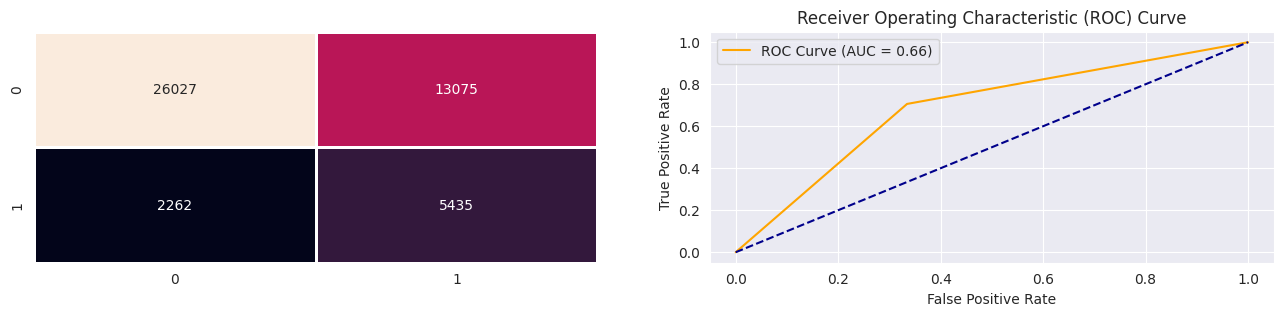

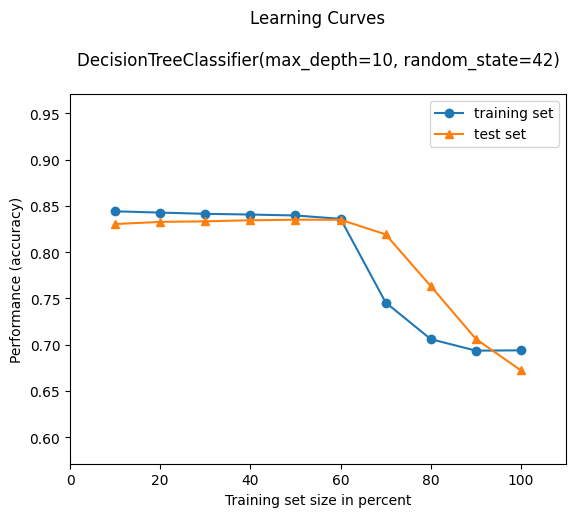


  Classification Report 
 
              precision    recall  f1-score   support

         0.0       0.92      0.67      0.77     39102
         1.0       0.29      0.71      0.41      7697

    accuracy                           0.67     46799
   macro avg       0.61      0.69      0.59     46799
weighted avg       0.82      0.67      0.71     46799

-----------------------------------------------------------------Random Forest-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



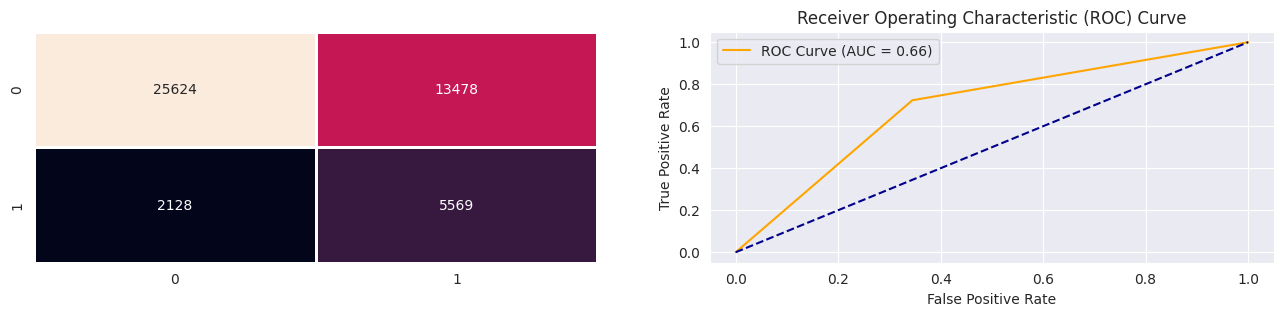

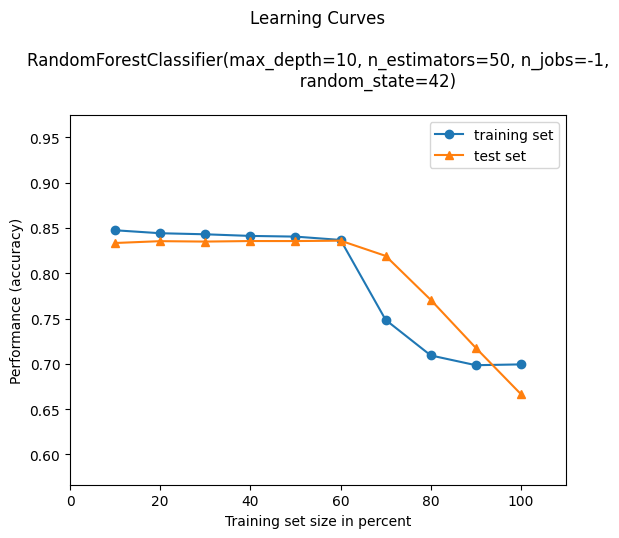


  Classification Report 
 
              precision    recall  f1-score   support

         0.0       0.92      0.66      0.77     39102
         1.0       0.29      0.72      0.42      7697

    accuracy                           0.67     46799
   macro avg       0.61      0.69      0.59     46799
weighted avg       0.82      0.67      0.71     46799

-----------------------------------------------------------------Naive Bayes Model-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



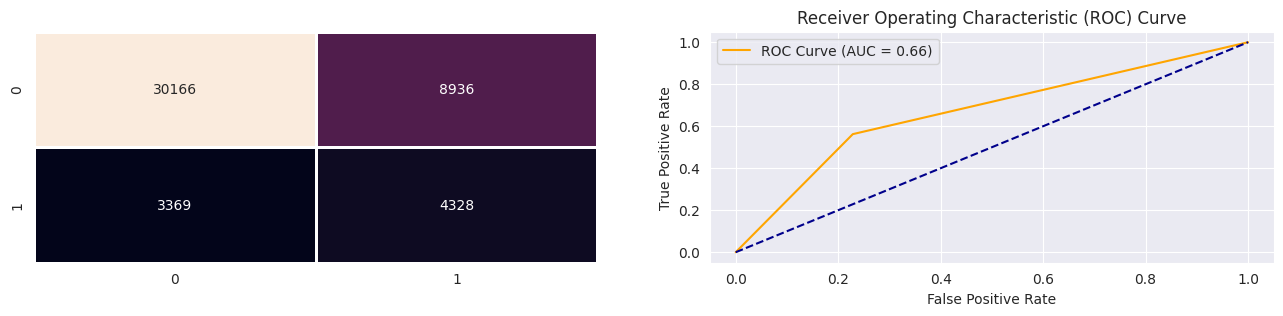

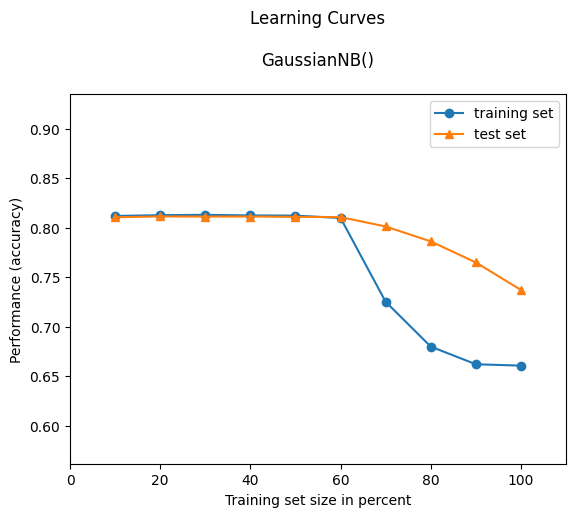


  Classification Report 
 
              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83     39102
         1.0       0.33      0.56      0.41      7697

    accuracy                           0.74     46799
   macro avg       0.61      0.67      0.62     46799
weighted avg       0.81      0.74      0.76     46799



In [153]:
for x in models:

    print('-'*65+x+'-'*65)
    algoritmo = models2[x]
    y_pred = algoritmo.predict(X_test_scaled3)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    cf_matrix = confusion_matrix(**arg_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    def plot_roc_curve(fpr, tpr):
        plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()

    fig, axs = plt.subplots(ncols=2, figsize=(16,3))
    sns.heatmap(cf_matrix, annot=True, cbar=False, ax=axs[0], linewidths=1, fmt='g')
    plot_roc_curve(fpr, tpr)
    plt.show()
    plot_learning_curves(X_train_scaled4, y_train_oversampled2, X_test_scaled4, y_test, algoritmo, scoring='accuracy')
    plt.show()
    print( Fore.GREEN + '\n  Classification Report \n ')
    print(classification_report(**arg_test))

# Validazione incrociata

K-Fold Cross Validation

In [154]:
from sklearn.model_selection import KFold,cross_val_score
X_all= X_train_oversampled.copy()
x=X_train_oversampled.copy()

# Inizializzazione dei modelli di machine learning con parametri ottimizzati
logistic_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=80)
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
naive_bayes_model = GaussianNB()

kf= KFold(n_splits=10)

cross_Acc = []
cross_MaxAcc = []
cross_MinAcc = []
def cross_valAccuracy(model_name,model,x,y,kf):

  print("Model Name :",model_name)
  kfold_score = cross_val_score(model, X=x, y=y_train_oversampled, cv=kf,scoring='accuracy')
  print("The mean cross validation scores of k-fold method with 10 folds is",kfold_score.mean())
  print("The MAX cross validation scores of k-fold method with 10 folds is",kfold_score.max())
  print("The MIN cross validation scores of k-fold method with 10 folds is",kfold_score.min())
  cross_Acc.append(kfold_score.mean())
  cross_MaxAcc.append(kfold_score.max())
  cross_MinAcc.append(kfold_score.min())
  # print("The std cross validation scores of k-fold method with 10 folds is",kfold_score.std())
  print("*****************************")

cross_valAccuracy("Logistic Model",logistic_model,X_all,y_train,kf)
cross_valAccuracy("Decision Tree ",decision_tree_model,X_all,y_train,kf)
cross_valAccuracy("Random Forest",random_forest_model,X_all,y_train,kf)
cross_valAccuracy("Naive Bayes Model",naive_bayes_model,X_all,y_train,kf)

Model Name : Logistic Model
The mean cross validation scores of k-fold method with 10 folds is 0.6905522979023292
The MAX cross validation scores of k-fold method with 10 folds is 0.6951086956521739
The MIN cross validation scores of k-fold method with 10 folds is 0.6874260686083314
*****************************
Model Name : Decision Tree 
The mean cross validation scores of k-fold method with 10 folds is 0.7990643987750212
The MAX cross validation scores of k-fold method with 10 folds is 0.8439847821221906
The MIN cross validation scores of k-fold method with 10 folds is 0.7677429667519181
*****************************
Model Name : Random Forest
The mean cross validation scores of k-fold method with 10 folds is 0.8149248213770154
The MAX cross validation scores of k-fold method with 10 folds is 0.8725342881805684
The MIN cross validation scores of k-fold method with 10 folds is 0.7726662404092072
*****************************
Model Name : Naive Bayes Model
The mean cross validation sc

<ipython-input-155-c571d37b9cbe>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




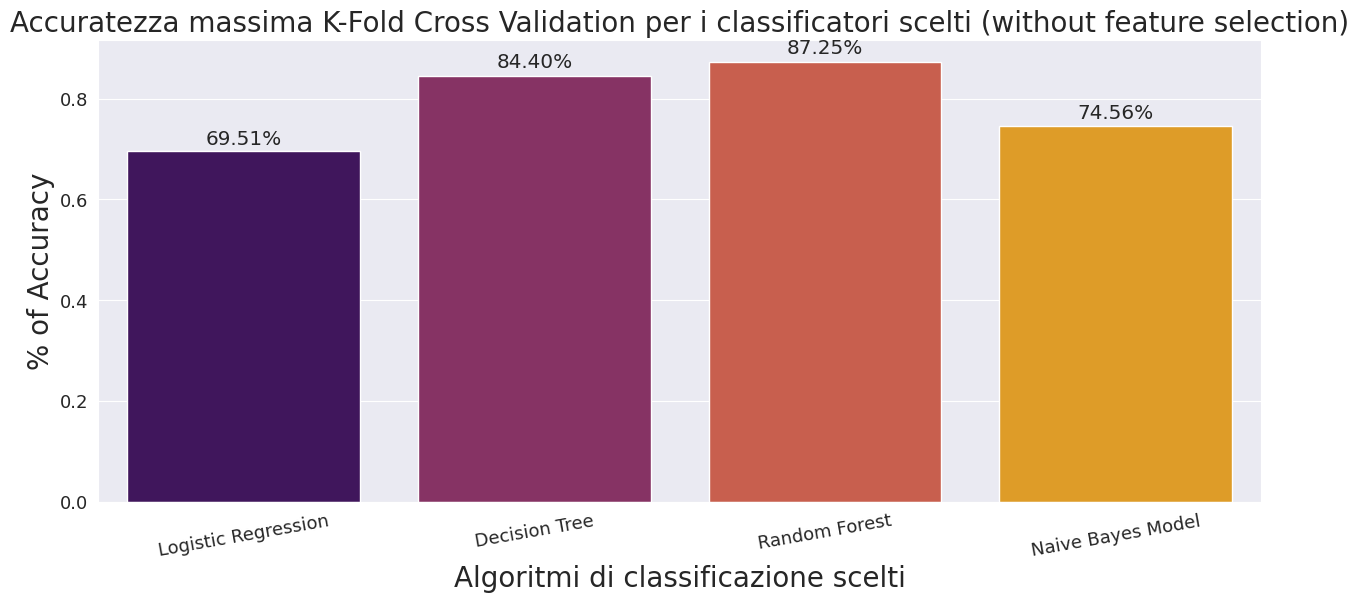

In [155]:
# GRAFICI ACCURATEZZA MAX PER OGNI CLASSIFICATORE IN K-FOLD

model_list = ["Logistic Regression", "Decision Tree","Random Forest","Naive Bayes Model"]

plt.rcParams['figure.figsize']=15,6
# sns.set_style("darkgrid")
ax = sns.barplot(x=model_list, y=cross_MaxAcc, palette="inferno" )
plt.xlabel("Algoritmi di classificazione scelti", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuratezza massima K-Fold Cross Validation per i classificatori scelti (without feature selection)", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 10)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [156]:

X_all= X_train_oversampled2.copy()
x=X_train_oversampled2.copy()

# Inizializzazione dei modelli di machine learning con parametri ottimizzati
logistic_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=80)
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
naive_bayes_model = GaussianNB()

kf= KFold(n_splits=10)

cross_Acc2 = []
cross_MaxAcc2 = []
cross_MinAcc2 = []
def cross_valAccuracy(model_name,model,x,y,kf):

  print("Model Name :",model_name)
  kfold_score = cross_val_score(model, X=x, y=y_train_oversampled2, cv=kf,scoring='accuracy')
  print("The mean cross validation scores of k-fold method with 10 folds is",kfold_score.mean())
  print("The MAX cross validation scores of k-fold method with 10 folds is",kfold_score.max())
  print("The MIN cross validation scores of k-fold method with 10 folds is",kfold_score.min())
  cross_Acc2.append(kfold_score.mean())
  cross_MaxAcc2.append(kfold_score.max())
  cross_MinAcc2.append(kfold_score.min())
  # print("The std cross validation scores of k-fold method with 10 folds is",kfold_score.std())
  print("*****************************")

cross_valAccuracy("Logistic Model",logistic_model,X_all,y,kf)
cross_valAccuracy("Decision Tree ",decision_tree_model,X_all,y,kf)
cross_valAccuracy("Random Forest",random_forest_model,X_all,y,kf)
cross_valAccuracy("Naive Bayes Model",naive_bayes_model,X_all,y,kf)


Model Name : Logistic Model
The mean cross validation scores of k-fold method with 10 folds is 0.6097581106114599
The MAX cross validation scores of k-fold method with 10 folds is 0.6304028132992328
The MIN cross validation scores of k-fold method with 10 folds is 0.578886793056044
*****************************
Model Name : Decision Tree 
The mean cross validation scores of k-fold method with 10 folds is 0.6293529407267601
The MAX cross validation scores of k-fold method with 10 folds is 0.6600914351481825
The MIN cross validation scores of k-fold method with 10 folds is 0.6116048593350384
*****************************
Model Name : Random Forest
The mean cross validation scores of k-fold method with 10 folds is 0.6366037134930089
The MAX cross validation scores of k-fold method with 10 folds is 0.6654944211771476
The MIN cross validation scores of k-fold method with 10 folds is 0.6160166240409207
*****************************
Model Name : Naive Bayes Model
The mean cross validation sco

<ipython-input-157-ab30d6b7f607>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




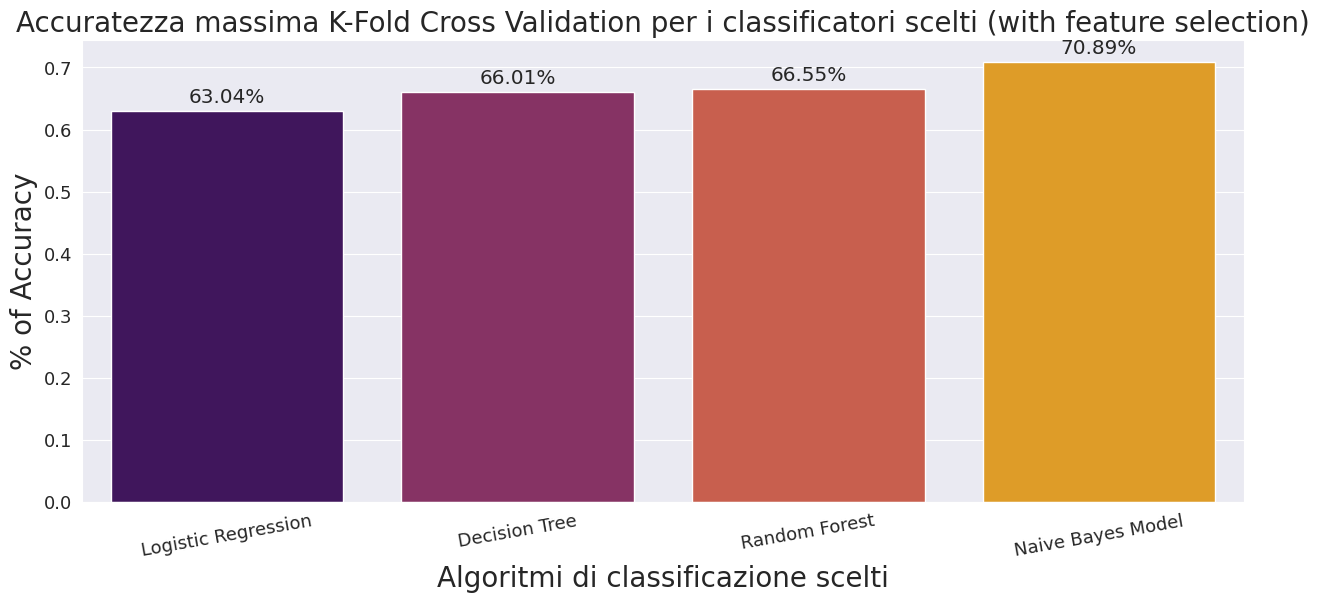

In [157]:
# GRAFICI ACCURATEZZA MAX PER OGNI CLASSIFICATORE IN K-FOLD

model_list = ["Logistic Regression", "Decision Tree","Random Forest","Naive Bayes Model"]

plt.rcParams['figure.figsize']=15,6
# sns.set_style("darkgrid")
ax = sns.barplot(x=model_list, y=cross_MaxAcc2, palette="inferno" )
plt.xlabel("Algoritmi di classificazione scelti", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuratezza massima K-Fold Cross Validation per i classificatori scelti (with feature selection)", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 10)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Confini decisionali

In [158]:
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# ... (il tuo codice di inizializzazione dei modelli) ...

# Assumendo che X_train_scaled2 e X_test_scaled2 siano DataFrame pandas e che
# y_train_oversampled e y_test siano i vettori target corretti

# Convertire i DataFrame pandas in array NumPy
X_train_scaled2_np = X_train_scaled2.to_numpy()
X_test_scaled2_np = X_test_scaled2.to_numpy()

# Definizione di una funzione per tracciare i confini decisionali
def plot_decision_boundaries(X, y, model, ax, title):
    # Assicurarsi che X sia un array NumPy per l'indicizzazione
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Tracciare il contorno e i punti di addestramento
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Creazione di una figura per contenere i subplots per ciascun modello
fig, axarr = plt.subplots(2, 2, figsize=(12, 10))

# Addestramento dei modelli e tracciamento dei confini decisionali
for ax, (name, model) in zip(axarr.flatten(), models.items()):
    model.fit(X_train_scaled2_np, y_train_oversampled)
    y_pred = model.predict(X_test_scaled2_np)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc}')
    print(f'{name} Classification Report:\n', classification_report(y_test, y_pred))
    plot_decision_boundaries(X_train_scaled2_np, y_train_oversampled, model, ax, f'{name} (Acc: {acc:.2f})')

# Regolazione automatica del layout dei subplot
plt.tight_layout()
plt.show()
'''

"\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import accuracy_score, classification_report\nimport pandas as pd\n\n# ... (il tuo codice di inizializzazione dei modelli) ...\n\n# Assumendo che X_train_scaled2 e X_test_scaled2 siano DataFrame pandas e che\n# y_train_oversampled e y_test siano i vettori target corretti\n\n# Convertire i DataFrame pandas in array NumPy\nX_train_scaled2_np = X_train_scaled2.to_numpy()\nX_test_scaled2_np = X_test_scaled2.to_numpy()\n\n# Definizione di una funzione per tracciare i confini decisionali\ndef plot_decision_boundaries(X, y, model, ax, title):\n    # Assicurarsi che X sia un array NumPy per l'indicizzazione\n    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1\n    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1\n    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\n                         np.arange(y_min, y_max, 0.1))\n    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])\n    Z = Z.reshape(xx.shape)\n\n    

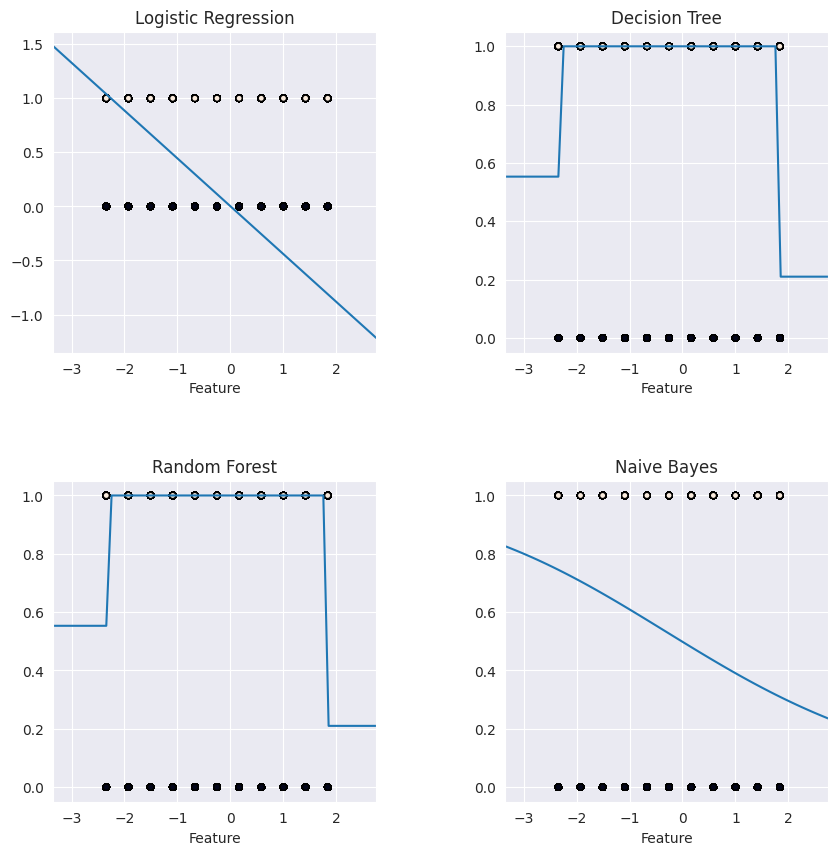

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Assumiamo che i tuoi DataFrame pandas siano già stati convertiti in array numpy e siano disponibili come:
# X_train_scaled_2, y_train_oversampled, X_test_scaled_2, y_test

# Estrai solo le colonne target

X_train = X_train_scaled_2[:, -1].reshape(-1, 1)  # Reshape per mantenere la compatibilità con scikit-learn
X_test = X_test_scaled_2[:, -1].reshape(-1, 1)    # Reshape per mantenere la compatibilità con scikit-learn
y_train = y_train_oversampled
y_test = y_test

# Definisci i modelli
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Addestramento dei modelli sui dati di training
for name, model in models.items():
    model.fit(X_train, y_train)

# Creazione di una griglia di punti per valutare i modelli
x_min, x_max = X_train.min() - 1, X_train.max() + 1
xx = np.arange(x_min, x_max, 0.1)

# Visualizzazione dei confini decisionali
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, (name, model) in enumerate(models.items()):
    ax = axs[i // 2, i % 2]

    # Valutare il modello sulla griglia
    if hasattr(model, "decision_function"):
        Z = model.decision_function(xx.reshape(-1, 1))
    else:
        Z = model.predict_proba(xx.reshape(-1, 1))[:, 1]

    Z = Z.reshape(xx.shape)

    # Tracciare i confini decisionali
    ax.plot(xx, Z, label='Decision Boundary')

    # Tracciare i punti del test set
    ax.scatter(X_test, y_test, c=y_test, s=20, edgecolor='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_xlabel('Feature')
    ax.set_title(name)

plt.show()


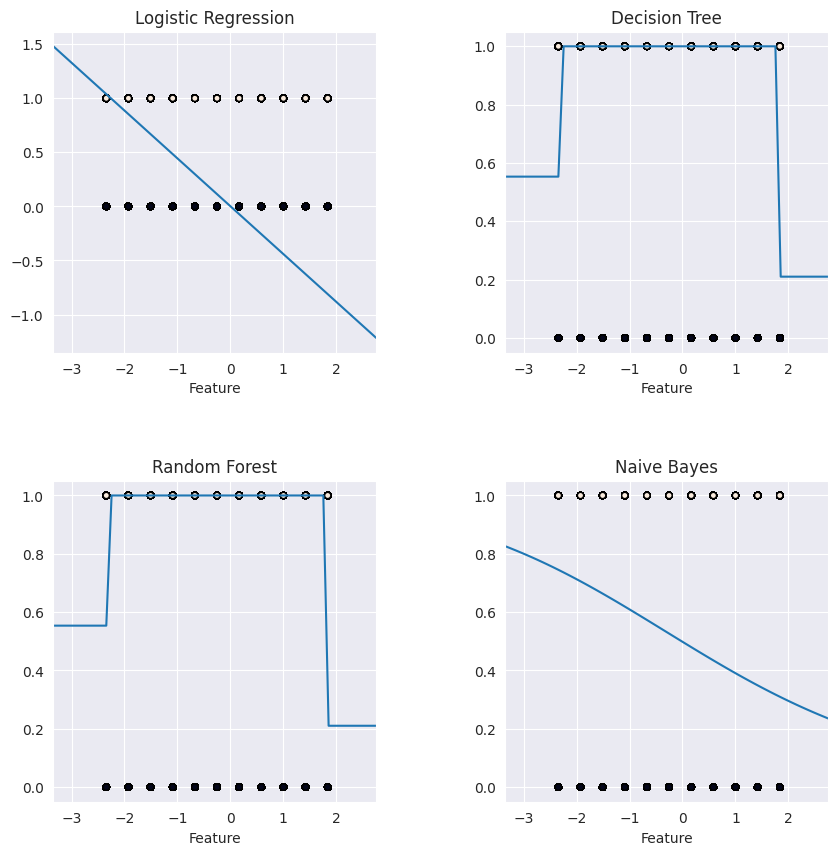

In [161]:
#tentativo di corinne
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Assumiamo che i tuoi DataFrame pandas siano già stati convertiti in array numpy e siano disponibili come:
# X_train_scaled_2, y_train_oversampled, X_test_scaled_2, y_test

# Estrai solo le colonne target
X_train = X_train_scaled_2[:, -1].reshape(-1, 1)  # Reshape per mantenere la compatibilità con scikit-learn
X_test = X_test_scaled_2[:, -1].reshape(-1, 1)    # Reshape per mantenere la compatibilità con scikit-learn
y_train = y_train_oversampled
y_test = y_test

# Definisci i modelli
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Addestramento dei modelli sui dati di training
for name, model in models.items():
    model.fit(X_train, y_train)

# Creazione di una griglia di punti per valutare i modelli
x_min, x_max = X_train.min() - 1, X_train.max() + 1
xx = np.arange(x_min, x_max, 0.1)

# Visualizzazione dei confini decisionali
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, (name, model) in enumerate(models.items()):
    ax = axs[i // 2, i % 2]

    # Valutare il modello sulla griglia
    if hasattr(model, "decision_function"):
        Z = model.decision_function(xx.reshape(-1, 1))
    else:
        Z = model.predict_proba(xx.reshape(-1, 1))[:, 1]

    Z = Z.reshape(xx.shape)

    # Tracciare i confini decisionali
    ax.plot(xx, Z, label='Decision Boundary')

    # Tracciare i punti del test set
    ax.scatter(X_test, y_test, c=y_test, s=20, edgecolor='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_xlabel('Feature')
    ax.set_title(name)

plt.show()


In [162]:
X_train_scaled2.shape

(312796, 12)

In [163]:
X_train_scaled3.shape

(312796, 3)

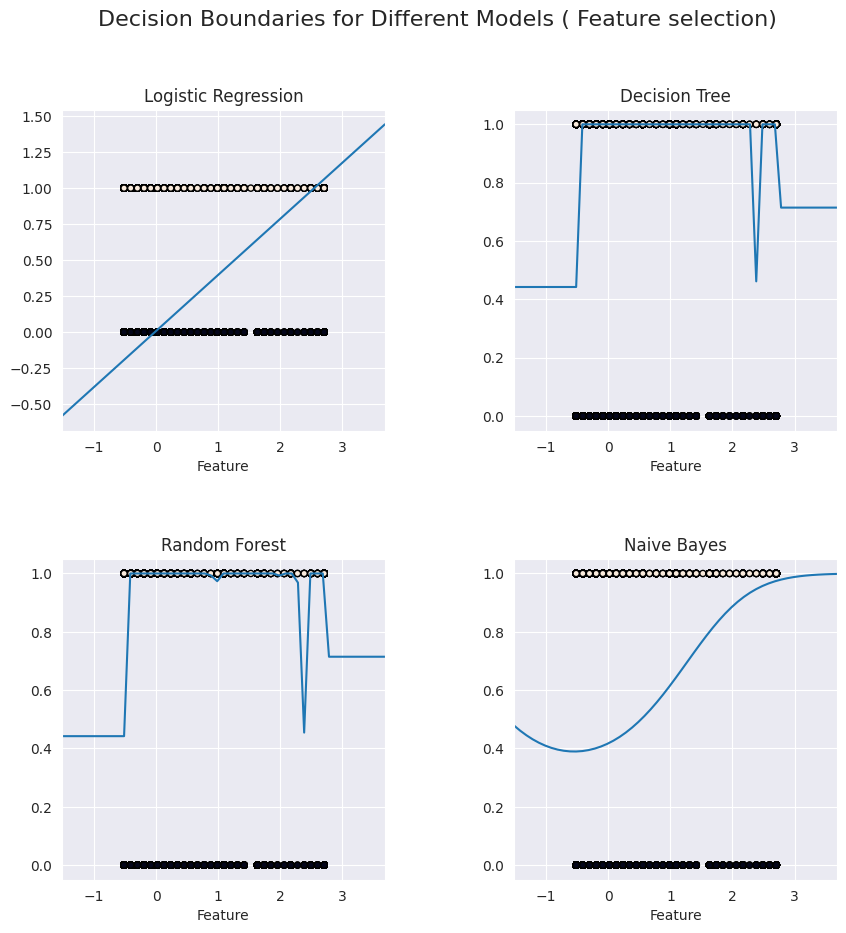

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Assumiamo che i tuoi DataFrame pandas siano già stati convertiti in array numpy e siano disponibili come:
# X_train_scaled3, y_train_oversampled2, X_test_scaled3, y_test

# Estrai solo le colonne target
X_train = X_train_scaled3[:, -1].reshape(-1, 1)  # Reshape per mantenere la compatibilità con scikit-learn
X_test = X_test_scaled3[:, -1].reshape(-1, 1)    # Reshape per mantenere la compatibilità con scikit-learn
y_train = y_train_oversampled2
y_test = y_test

# Definisci i modelli
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Addestramento dei modelli sui dati di training
for name, model in models.items():
    model.fit(X_train, y_train)

# Creazione di una griglia di punti per valutare i modelli
x_min, x_max = X_train.min() - 1, X_train.max() + 1
xx = np.arange(x_min, x_max, 0.1)

# Visualizzazione dei confini decisionali
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, (name, model) in enumerate(models.items()):
    ax = axs[i // 2, i % 2]

    # Valutare il modello sulla griglia
    if hasattr(model, "decision_function"):
        Z = model.decision_function(xx.reshape(-1, 1))
    else:
        Z = model.predict_proba(xx.reshape(-1, 1))[:, 1]

    Z = Z.reshape(xx.shape)

    # Tracciare i confini decisionali
    ax.plot(xx, Z, label='Decision Boundary')

    # Tracciare i punti del test set
    ax.scatter(X_test, y_test, c=y_test, s=20, edgecolor='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_xlabel('Feature')
    ax.set_title(name)
fig.suptitle('Decision Boundaries for Different Models ( Feature selection)', fontsize=16)
plt.show()

In [165]:
"""
from itertools import product
import matplotlib.pyplot

cmap = matplotlib.colors.ListedColormap(["crimson", "indigo"])



X = X_train_scaled4.iloc[:,:-1].values
y = y_train_oversampled2.values

# Training classifiers
clf1 = LogisticRegression(solver='liblinear', random_state=42, max_iter=80)
clf2 = DecisionTreeClassifier(max_depth=10, random_state=42)
clf3 = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
eclf = GaussianNB()

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(20, 20))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Logistic Regression',  'Decision Tree', 'Random Forest', 'Naive Bayes Model']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.6, cmap='plasma')
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=50, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    """


'\nfrom itertools import product\nimport matplotlib.pyplot\n\ncmap = matplotlib.colors.ListedColormap(["crimson", "indigo"])\n\n\n\nX = X_train_scaled4.iloc[:,:-1].values\ny = y_train_oversampled2.values\n\n# Training classifiers\nclf1 = LogisticRegression(solver=\'liblinear\', random_state=42, max_iter=80)\nclf2 = DecisionTreeClassifier(max_depth=10, random_state=42)\nclf3 = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)\neclf = GaussianNB()\n\nclf1.fit(X, y)\nclf2.fit(X, y)\nclf3.fit(X, y)\neclf.fit(X, y)\n\n# Plotting decision regions\nx_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1\ny_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1\nxx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\n                     np.arange(y_min, y_max, 0.1))\n\nf, axarr = plt.subplots(2, 2, sharex=\'col\', sharey=\'row\', figsize=(20, 20))\n\nfor idx, clf, tt in zip(product([0, 1], [0, 1]),\n                        [clf1, clf2, clf3, eclf],\n                        

In [ ]:
duration = timedelta(seconds=time.perf_counter()-starttime)
print('Tempo di esecuzione dell\'intero codice: ', duration)